# Introduction
In this notebook, I will look deeper into Exploratory Data Analysis and the data preparation process for investigating data by regression models. 

It is part of my studying of Machine learning through the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).

## Main objective

This notebook focuses on preparing data for regression analysis and performing preliminary EDA. I will look at world metrics such as population, area, GDP, happiness index, etc., for the years 2017, 2020-2022 and try to figure out which have more prominent effects on internet parameters (speed, users, price) in different countries.


## Data description

The data set I prepared for this project is composed of 8 merged data sets and covers 120 countries for the 2017, 2020-2022 years. The table below shows a brief description of the data set columns. 

|No|Column              |Description                                                       |Data type|Source|
|--|--------------------|------------------------------------------------------------------|:-------:|:----:|
|01|country             |Сountry name                                                      |object   |1     |
|02|region              |Region name                                                       |object   |1     |
|03|surf_area           |Surfase area (km<sup>2</sup>)                                     |int64    |1     |
|04|gdp                 |Gross Domestic Product (Billions USD)                             |float    |2     |
|05|gdp_pc              |Gross Domestic Product per Capita                                 |float    |2     |
|06|happiness           |Happiness score, Ladder score (between 10 (best) and 0 (worst) possible life)|float    |3     |
|07|pop                 |Population                                                        |int64    |2     |
|08|density             |Population density (people per km<sup>2</sup>)                    |float    |1, 2   |
|09|pop_14-             |Population age 0-14 years, %                                      |float    |1     |
|10|pop_60+             |Population age distribution 60+ years, %                          |float    |1     |
|11|urban_pop           |Urban population (% of total population)                          |float    |1     |
|12|pop_grow            |Population growth rate (average annual %)                         |float    |1     |
|13|fertility           |Fertility rate, total (live births per woman)                     |float    |1     |
|14|ratio_m_to_f        |Sex ratio (m per 100 f)                                           |float    |1     |
|15|users               |Internet users                                                    |int64    |4     |
|16|user_to_pop         |Internet users per Capita                                         |float    |2, 4   |
|17|sim_card            |Amount of SIM Card in Country                                     |float    |1     |
|18|sim_to_pop          |Mobile-cellular subscriptions (per 100 inhabitants)               |float    |1, 2   |
|19|speed               |Avarege Internet Speed (Mbit/s)                                   |float    |4     |
|20|n_plans             |Number of Internet Plans                                          |float    |4     |
|21|aver_22             |Average price of 1GB (USD  at the start of 2022)                  |float    |4     |
|22|min_22              |Cheapest 1GB for 30 days (USD)                                    |float    |4     |
|23|max_22              |Most expensive 1GB (USD)                                          |float    |4     |
|24|aver_21             |Average price of 1GB (USD  at the start of 2021)                  |float    |4     |
|25|aver_20             |Average price of 1GB (USD – at start of 2020)                     |float    |4     |
|26|work_agr            |Employment: Agriculture (% of employed)                           |float    |1     |
|27|work_ind            |Employment: Industry (% of employed)                              |float    |1     |
|28|work_serv           |Employment: Services (% of employed)                              |float    |1     |
|29|no_work             |Unemployment (% of labour force)                                  |float    |1     |
|30|econ_agr            |Economy: Agriculture (% of GVA)                                   |float    |1     |
|31|econ_ind            |Economy: Industry (% of GVA)                                      |float    |1     |
|32|econ_serv           |Economy: Services and other activity (% of GVA)                   |float    |1     |

You can find the notebook on cleaning and merging source data sets [here](https://www.kaggle.com/code/semenvasilev/merging-world-internet-usage-set-coursera/notebook)

#### Sources


1. [SRK data set](https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles)<br>
2. [United Nations Statistics Division](https://unstats.un.org/unsd/snaama/Basic) <br>
3. [World Happiness Report](https://worldhappiness.report/ed/2022/)<br>
4. [RAM JAS MAURYA data set](http://www.kaggle.com/datasets/ramjasmaurya/1-gb-internet-price)

## Project methodology

#### Data cleaning   
I prepared this data set myself so I know it doesn't have NAs, missing values, incorrect symbols and duplicates.   

#### Data normalization   
As I prepare this data set for regression analysis, I should normalise all data. Also, I should preserve data explainability. For this purpose, I use only simple transformations like logarithmic, root, or power transformations to normalise data distributions. More information can be found in the article [Data transformation: a focus on the interpretation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7714623/) by Dong Kyu Lee.

#### Data scaling  
I use `MinMaxScaler()` to scale my variables.

#### Feature selection   
Based on my examination of this data set, I expect many features to strongly correlate with each other. In the ideal case, predicting features in the regression model are supposed to be independent of each other. If they are strongly correlated, **multicollinearity** occurs, which should be avoided. 
>Multicollinearity causes the following two primary types of problems:
>   * The coefficient estimates can swing wildly based on other independent variables in the model. The coefficients become very sensitive to small changes in the model.   
>   * Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.   

>One of the easiest solutions is to remove some of the highly correlated independent variables.
>[Multicollinearity in Regression Analysis: Problems, Detection, and Solutions](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)   
    
To analyze multicollinearity in my data set I will:
* Look at the **correlation coefficients** between various features and between features and targets to estimate the strength of the linear relationship between them;
* Calculate the [**Variance Inflation Factor (VIF)**](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/) and use it to decide if I want to remove some of the highly correlated predicting features.

Many thanks to [Daria](https://www.kaggle.com/code/dariasvasileva/world-metrics-and-happiness-regression-problem) for providing this information.

#### EDA
I create several plots to analyse Internet data by Continents and find insights.

#### Hypothesis testing
I test three hypotheses by statistical methods


In [1]:
# Import Libs

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # vis
import matplotlib.pyplot as plt # vis
from functools import reduce #merge several df in one action

from sklearn import preprocessing #min-max scalling

import plotly.express as px # interactive plots
import statsmodels.formula.api as smf #statistica. check hypotesas 

from statsmodels.stats.outliers_influence import variance_inflation_factor #Multicollinearity analysis

# Data loading and Data Set Information

In [2]:
# Read df
df_all=pd.read_csv('../input/internet-users-over-the-world/df_all.csv')
df_all=df_all.drop(['Unnamed: 0'],axis=1)

#Info
df_all.info()
df_all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       120 non-null    object 
 1   region        120 non-null    object 
 2   surf_area     120 non-null    int64  
 3   gdp           120 non-null    float64
 4   gdp_pc        120 non-null    float64
 5   happiness     120 non-null    float64
 6   pop           120 non-null    int64  
 7   density       120 non-null    float64
 8   pop_14-       120 non-null    float64
 9   pop_60+       120 non-null    float64
 10  urban_pop     120 non-null    float64
 11  pop_grow      120 non-null    float64
 12  fertility     120 non-null    float64
 13  ratio_m_to_f  120 non-null    float64
 14  users         120 non-null    int64  
 15  user_to_pop   120 non-null    float64
 16  sim_card      120 non-null    float64
 17  sim_to_pop    120 non-null    float64
 18  speed         120 non-null    

,country,region,surf_area,gdp,gdp_pc,happiness,pop,density,pop_14-,pop_60+,...,max_22,aver_21,aver_20,work_agr,work_ind,work_serv,no_work,econ_agr,econ_ind,econ_serv
0,China,Eastern Asia,9600000,24.333020,37473.753262,6.512,1439323776,149.929560,17.7,16.2,...,1.21,0.61,9.89,27.0,23.9,49.1,4.6,9.2,41.1,49.7
1,India,Southern Asia,3287263,2664.748748,1930.971218,3.777,1380004385,419.803461,27.8,9.4,...,2.73,0.09,0.26,44.3,24.5,31.2,3.4,17.0,29.7,53.2
2,United States,Northern America,9833517,20893.746000,63122.594145,6.977,331002651,33.660658,18.9,21.5,...,30.00,8.00,8.34,1.5,17.2,81.3,4.9,1.0,19.7,79.3
3,Indonesia,South-eastern Asia,1910931,1058.423841,3869.588520,5.240,273523615,143.136312,27.4,8.6,...,2.94,0.64,2.99,31.4,22.4,46.2,5.8,14.0,41.3,44.7
4,Brazil,South America,8515767,1444.733210,6796.844058,6.293,212559417,24.960690,21.7,12.6,...,2.72,1.01,3.50,15.2,21.5,63.2,12.4,5.2,22.7,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Mongolia,Eastern Asia,1564116,13.137128,4007.311280,5.761,3278290,2.095938,29.7,6.6,...,3.70,0.74,0.82,28.4,20.7,51.0,6.3,14.8,34.1,51.1
116,Mauritius,Eastern Africa,1969,10.920599,8586.942672,6.071,1271768,645.895378,18.4,16.6,...,6.49,2.48,0.51,7.3,25.2,67.5,7.6,2.9,22.7,74.4
117,Luxembourg,Western Europe,2586,73.353133,117181.646629,7.404,625978,242.064192,16.4,19.6,...,7.10,3.89,13.95,1.3,10.2,88.5,5.6,0.2,12.1,87.7
118,Montenegro,Southern Europe,13812,4.789457,7625.722017,5.547,628066,45.472488,18.1,21.3,...,5.90,3.94,2.83,7.5,17.3,75.2,17.4,9.8,17.5,72.6


In [3]:
# visualize internet speed on the map
fig = px.choropleth(df_all, 
                    locations = 'country',
                    color = 'speed', 
                    locationmode = 'country names',
#                     hover_name = 'country',
                    hover_data = ['speed'],
                    title = 'Average Ineternet Speed',
                    color_continuous_scale = px.colors.diverging.BrBG,
                    projection = 'orthographic')

# adjusting size of map, legend place, and background colour
fig.update_layout(
    autosize=False,
    width=600,
    height=450,
    coloraxis_colorbar=dict(title="Speed, Mbit/s"),
    margin=dict(
        l=10,
        r=10,
        b=20,
        t=40,
        pad=4
    ),
    template='seaborn',
    paper_bgcolor='rgb(234, 234, 242)',
    legend=dict(
        orientation='v',
        yanchor='auto',
        y=1.02,
        xanchor='right',
        x=1
))

fig.show()

In [4]:
# visualize internet user to population on the map
fig = px.choropleth(df_all, 
                    locations = 'country',
                    color = 'user_to_pop', 
                    locationmode = 'country names',
#                     hover_name = 'country',
                    hover_data = ['user_to_pop'],
                    title = 'Internet User to Country Population',
                    color_continuous_scale = px.colors.diverging.RdYlBu[::-1],
                    projection = 'orthographic')

# adjusting size of map, legend place, and background colour
fig.update_layout(
    autosize=False,
    width=600,
    height=450,
    coloraxis_colorbar=dict(title="User/Population, %"),
    margin=dict(
        l=10,
        r=10,
        b=20,
        t=40,
        pad=4
    ),
    template='seaborn',
    paper_bgcolor='rgb(234, 234, 242)',
    legend=dict(
        orientation='v',
        yanchor='auto',
        y=1.02,
        xanchor='right',
        x=1
))

fig.show()

In [5]:
# visualize internet avarege price on the map
fig = px.choropleth(df_all, 
                    locations = 'country',
                    color = 'aver_22', 
                    locationmode = 'country names',
#                     hover_name = 'country',
                    hover_data = ['aver_22'],
                    title = 'Averege Price in 2022 year',
                    color_continuous_scale = px.colors.diverging.RdYlBu[::-1],
                    projection = 'orthographic')

# adjusting size of map, legend place, and background colour
fig.update_layout(
    autosize=False,
    width=600,
    height=450,
    coloraxis_colorbar=dict(title="Price, GB/USD"),
    margin=dict(
        l=10,
        r=10,
        b=20,
        t=40,
        pad=4
    ),
    template='seaborn',
    paper_bgcolor='rgb(234, 234, 242)',
    legend=dict(
        orientation='v',
        yanchor='auto',
        y=1.02,
        xanchor='right',
        x=1
))

fig.show()

# Data preprocessing

In [6]:
# look at distribution of values for each variable
statistics = df_all.describe().T
statistics['range'] = statistics.apply(lambda row: row['max'] - row['min'], axis = 1)
statistics

,count,mean,std,min,25%,50%,75%,max,range
surf_area,120.0,9.596019e+05,2.379010e+06,315.000000,6.510775e+04,2.375955e+05,6.955858e+05,1.709825e+07,1.709793e+07
gdp,120.0,5.710637e+02,2.022218e+03,4.789457,2.885456e+01,8.864386e+01,3.642189e+02,2.089375e+04,2.088896e+04
gdp_pc,120.0,1.688197e+04,2.137181e+04,448.843891,3.126870e+03,6.992946e+03,2.295935e+04,1.171816e+05,1.167328e+05
happiness,120.0,5.713475e+00,1.049880e+00,2.404000,5.057000e+00,5.853500e+00,6.452000e+00,7.821000e+00,5.417000e+00
pop,120.0,5.988144e+07,1.852370e+08,441543.000000,5.520450e+06,1.174582e+07,4.533208e+07,1.439324e+09,1.438882e+09
density,120.0,2.315371e+02,7.784349e+02,2.095938,4.524581e+01,9.159423e+01,1.622246e+02,8.136776e+03,8.134680e+03
pop_14-,120.0,2.466417e+01,9.418824e+00,12.900000,1.647500e+01,2.310000e+01,3.000000e+01,4.770000e+01,3.480000e+01
pop_60+,120.0,1.469667e+01,8.265530e+00,2.400000,7.075000e+00,1.215000e+01,2.252500e+01,3.340000e+01,3.100000e+01
urban_pop,120.0,6.270250e+01,2.106411e+01,16.100000,4.922500e+01,6.625000e+01,7.905000e+01,1.000000e+02,8.390000e+01
pop_grow,120.0,1.189167e+00,1.274560e+00,-1.400000,3.000000e-01,1.200000e+00,1.825000e+00,6.000000e+00,7.400000e+00


From the statistics table above, we can see that variables have very different ranges. That is why scaling the data is extremely important when the focus of the analysis is on the interpretation. 

## Data Normalising and Scaling  

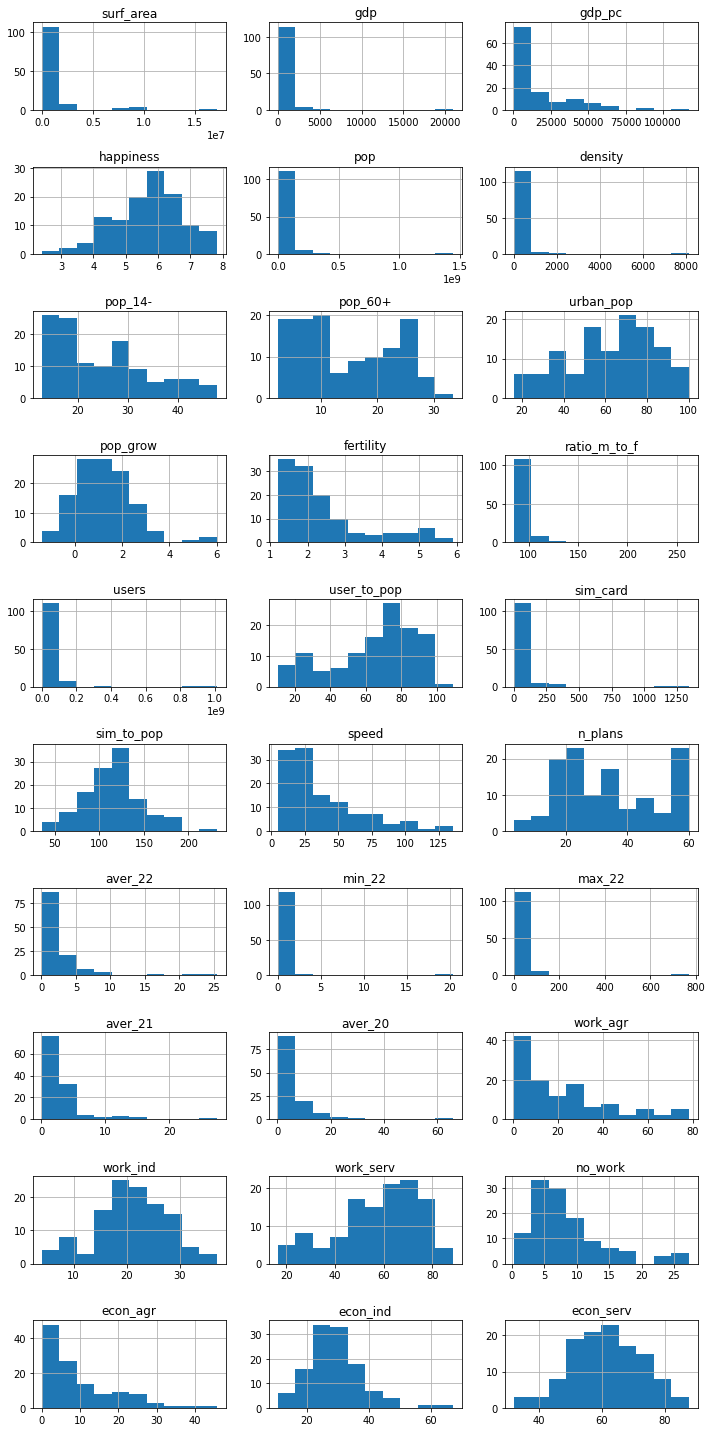

In [7]:
# Build histograms for all numerical variables
fig, ax = plt.subplots(10, 3, sharex=False, sharey=False, figsize=(10, 20))

col=2 # two first columns are 'object'
for i in range(10):
    for j in range(3):
        df_all.hist(column = df_all.columns[col], bins = 10, ax=ax[i,j])
        col += 1
            
fig.tight_layout()
fig.show()

I calculate skewness scores to decide which variables require normalizing. Positively and negatively skewed distributions usually require different transformations to normalize.

For positively skewed variables I am going to try Logarithmic, Cubic and higher  Root Transformations.
For negatively skewed variables I am going to try Power (square, cubic and higher power) Transformations.
I select the most suitable transformation for each variable based on its skewness score after the transformation and create new data set with transformed variables.

In [8]:
# calculate skewness scores
skewness = df_all.skew(axis=0, numeric_only = True).to_dict()

# define skewness threshold
skewness_threshold = 0.5 #if skewness by the module is less than 0.5, we say data is not skewed

# create lists of columns that require normalizing 
# positively and negatively skewed variables to be processed by different transformations
pos_skewed_cols = []
neg_skewed_cols = []
no_skewed_cols = []
for i in skewness:
    if abs(skewness[i]) > skewness_threshold:
        if skewness[i] > 0:
            pos_skewed_cols.append(i)
        else:
            neg_skewed_cols.append(i)
    else:
        no_skewed_cols.append(i)

# print results
for i in pos_skewed_cols:
    print(f"Column {i} is positively skewed: score {round(skewness[i], 2)}")

print('-'*60)

for i in neg_skewed_cols:
    print(f"Column {i} is negatively skewed: score {round(skewness[i], 2)}")
    
print('-'*60)

for i in no_skewed_cols:
    print(f"Column {i} is not skewed: score {round(skewness[i], 2)}")

Column surf_area is positively skewed: score 4.44
Column gdp is positively skewed: score 8.83
Column gdp_pc is positively skewed: score 2.0
Column pop is positively skewed: score 6.67
Column density is positively skewed: score 9.13
Column pop_14- is positively skewed: score 0.71
Column pop_grow is positively skewed: score 0.83
Column fertility is positively skewed: score 1.39
Column ratio_m_to_f is positively skewed: score 7.48
Column users is positively skewed: score 6.43
Column sim_card is positively skewed: score 6.23
Column speed is positively skewed: score 1.47
Column aver_22 is positively skewed: score 4.36
Column min_22 is positively skewed: score 9.8
Column max_22 is positively skewed: score 9.12
Column aver_21 is positively skewed: score 3.5
Column aver_20 is positively skewed: score 4.9
Column work_agr is positively skewed: score 1.16
Column no_work is positively skewed: score 1.44
Column econ_agr is positively skewed: score 1.42
Column econ_ind is positively skewed: score 1.

In [9]:
# make a df of not skewed columns
# skewness before transformations
no_transf_dict = df_all[no_skewed_cols].skew(axis=0, numeric_only = True).to_dict()
no_skew = pd.DataFrame(list(no_transf_dict.items()), columns = ['vars','skew_no_transform'])
no_skew_T = no_skew.set_index('vars').T.abs().replace(0, np.nan) 


# Selected transformation. 

no_skew_trans_dict = no_skew_T.idxmin().to_dict()
no_skew_ready = pd.DataFrame(list(no_skew_trans_dict.items()), columns = ['vars', 'selected_transformation'])

no_skew_trans_dict = no_skew_T.min().to_dict()
no_skew_ready = pd.merge(no_skew_ready,pd.DataFrame(list(no_skew_trans_dict.items()), columns = ['vars', 'skew_value']),on = ['vars'])          
no_skew_ready #df of not skewed columns

,vars,selected_transformation,skew_value
0,happiness,skew_no_transform,0.449934
1,pop_60+,skew_no_transform,0.270888
2,urban_pop,skew_no_transform,0.386888
3,sim_to_pop,skew_no_transform,0.277653
4,n_plans,skew_no_transform,0.374954
5,work_ind,skew_no_transform,0.230742
6,econ_serv,skew_no_transform,0.128375


In [10]:
# create a data frame with skewness coefficients before and after different transformations to choose the ones to use
# for positively skewed variables
# All columns have values > 0. I can use even and odd roots 

# skewness before transformations
pos_no_transf_dict = df_all[pos_skewed_cols].skew(axis=0, numeric_only = True).to_dict()
pos_skew = pd.DataFrame(list(pos_no_transf_dict.items()), columns = ['vars','skew_no_transform'])

# skewness after Logarithmic Transformation
pos_log_transf_dict = df_all[pos_skewed_cols].apply(np.log1p).skew(axis=0, numeric_only = True).to_dict()
pos_skew = pd.merge(pos_skew, 
                    pd.DataFrame(list(pos_log_transf_dict.items()), columns = ['vars','skew_log_transform']), 
                    on = ['vars'])

# skewness after Square Root Transformation
pos_sqrt_transf_dict = df_all[pos_skewed_cols].apply(np.sqrt).skew(axis=0, numeric_only = True).to_dict()
pos_skew = pd.merge(pos_skew, 
                    pd.DataFrame(list(pos_sqrt_transf_dict.items()), columns = ['vars','skew_sqrt_transform']), 
                    on = ['vars'])

# skewness after Cubic Root Transformation
pos_cbrt_transf_dict = df_all[pos_skewed_cols].apply(np.cbrt).skew(axis=0, numeric_only = True).to_dict()
pos_skew = pd.merge(pos_skew, 
                    pd.DataFrame(list(pos_cbrt_transf_dict.items()), columns = ['vars','skew_cbrt_transform']), 
                    on = ['vars'])

# skewness after 4th Root Transformation
pos_4rt_transf_dict = df_all[pos_skewed_cols].apply(lambda x: pow(x, 1/4)).skew(axis=0, numeric_only = True).to_dict()
pos_skew = pd.merge(pos_skew, 
                    pd.DataFrame(list(pos_4rt_transf_dict.items()), columns = ['vars','skew_4rt_transform']), 
                    on = ['vars'])

# skewness after 5th Root Transformation
pos_5rt_transf_dict = df_all[pos_skewed_cols].apply(lambda x: pow(x, 1/5)).skew(axis=0, numeric_only = True).to_dict()
pos_skew = pd.merge(pos_skew, 
                    pd.DataFrame(list(pos_5rt_transf_dict.items()), columns = ['vars','skew_5rt_transform']), 
                    on = ['vars'])

# skewness after Reciprocals Transformation
pos_rec_transf_dict = df_all[pos_skewed_cols].apply(np.reciprocal).skew(axis=0, numeric_only = True).to_dict()
pos_skew = pd.merge(pos_skew, 
                    pd.DataFrame(list(pos_rec_transf_dict.items()), columns = ['vars','skew_rec_transform']), 
                    on = ['vars'])

# transposed matrix for selecting the best transformation
pos_skew_T=pos_skew.set_index('vars').T.abs().replace(0, np.nan) 

# Selected transformation. 
pos_skew_trans_dict = pos_skew_T.idxmin().to_dict()
pos_skew_ready = pd.DataFrame(list(pos_skew_trans_dict.items()), columns = ['vars', 'selected_transformation'])
pos_skew_value_dict = pos_skew_T.min().to_dict()
pos_skew_ready = pd.merge(pos_skew_ready,pd.DataFrame(list(pos_skew_value_dict.items()), columns = ['vars', 'skew_value']),on = ['vars'])          
pos_skew_ready #df of positive skewed columns


,vars,selected_transformation,skew_value
0,surf_area,skew_log_transform,0.497491
1,gdp,skew_log_transform,0.449244
2,gdp_pc,skew_log_transform,0.004394
3,pop,skew_log_transform,0.279245
4,density,skew_log_transform,0.044100
5,pop_14-,skew_rec_transform,0.169465
6,pop_grow,skew_sqrt_transform,0.034343
7,fertility,skew_rec_transform,0.059760
8,ratio_m_to_f,skew_rec_transform,3.788288
9,users,skew_log_transform,0.488079


In [11]:
# for negatively skewed variables
# All columns have values >0. I can use even and odd Powers 

# skewness before transformations
neg_no_transf_dict = df_all[neg_skewed_cols].skew(axis=0, numeric_only = True).to_dict()
neg_skew = pd.DataFrame(list(neg_no_transf_dict.items()), columns = ['vars','skew_no_transform'])

# skewness after Square Transformation
neg_square_transf_dict = df_all[neg_skewed_cols].apply(lambda x: pow(x, 2)).skew(axis=0, numeric_only = True).to_dict()
neg_skew = pd.merge(neg_skew, 
                    pd.DataFrame(list(neg_square_transf_dict.items()), columns = ['vars','skew_square_transform']), 
                    on = ['vars'])

# skewness after Cubic Transformation
neg_cubic_transf_dict = df_all[neg_skewed_cols].apply(lambda x: pow(x, 3)).skew(axis=0, numeric_only = True).to_dict()
neg_skew = pd.merge(neg_skew, 
                    pd.DataFrame(list(neg_cubic_transf_dict.items()), columns = ['vars','skew_cubic_transform']), 
                    on = ['vars'])

# skewness after 4th Power Transformation
neg_4p_transf_dict = df_all[neg_skewed_cols].apply(lambda x: pow(x, 4)).skew(axis=0, numeric_only = True).to_dict()
neg_skew = pd.merge(neg_skew, 
                    pd.DataFrame(list(neg_4p_transf_dict.items()), columns = ['vars','skew_4p_transform']), 
                    on = ['vars'])

# skewness after 5th Power Transformation
neg_5p_transf_dict = df_all[neg_skewed_cols].apply(lambda x: pow(x, 5)).skew(axis=0, numeric_only = True).to_dict()
neg_skew = pd.merge(neg_skew, 
                    pd.DataFrame(list(neg_5p_transf_dict.items()), columns = ['vars','skew_5p_transform']), 
                    on = ['vars'])

# skewness after 6th Power Transformation
neg_6p_transf_dict = df_all[neg_skewed_cols].apply(lambda x: pow(x, 6)).skew(axis=0, numeric_only = True).to_dict()
neg_skew = pd.merge(neg_skew, 
                    pd.DataFrame(list(neg_6p_transf_dict.items()), columns = ['vars','skew_6p_transform']), 
                    on = ['vars'])

# skewness after 7th Power Transformation
neg_7p_transf_dict = df_all[neg_skewed_cols].apply(lambda x: pow(x, 7)).skew(axis=0, numeric_only = True).to_dict()
neg_skew = pd.merge(neg_skew, 
                    pd.DataFrame(list(neg_7p_transf_dict.items()), columns = ['vars','skew_7p_transform']), 
                    on = ['vars'])

# transposed matrix for selecting the best transformation
neg_skew_T=neg_skew.set_index('vars').T.abs().replace(0, np.nan) 

# Selected transformation. 
neg_skew_trans_dict = neg_skew_T.idxmin().to_dict()
neg_skew_ready = pd.DataFrame(list(neg_skew_trans_dict.items()), columns = ['vars', 'selected_transformation'])
neg_skew_value_dict = neg_skew_T.min().to_dict()
neg_skew_ready = pd.merge(neg_skew_ready,pd.DataFrame(list(neg_skew_value_dict.items()), columns = ['vars', 'skew_value']),on = ['vars'])          
neg_skew_ready #df of negative skewed columns

,vars,selected_transformation,skew_value
0,user_to_pop,skew_square_transform,0.079894
1,work_serv,skew_square_transform,0.052770


In [12]:
# Merge sets 
all_skew_transformed=[neg_skew_ready, pos_skew_ready, no_skew_ready]
all_skew_transformed = reduce(lambda  left,right: pd.merge(left,right, how='outer'), all_skew_transformed)
# all_skew_transformed = all_skew_transformed.sort_values(by=['selected_transformation'])
all_skew_transformed['selected_transformation'] = all_skew_transformed['selected_transformation'].apply(lambda x: x[5:] )
all_skew_transformed #df with information of skew all columns

,vars,selected_transformation,skew_value
0,user_to_pop,square_transform,0.079894
1,work_serv,square_transform,0.052770
2,surf_area,log_transform,0.497491
3,gdp,log_transform,0.449244
4,gdp_pc,log_transform,0.004394
5,pop,log_transform,0.279245
6,density,log_transform,0.044100
7,pop_14-,rec_transform,0.169465
8,pop_grow,sqrt_transform,0.034343
9,fertility,rec_transform,0.059760


In [13]:
# Afte all transformations infornation about skewness
all_skew_transformed['skew_level'] = pd.cut(all_skew_transformed['skew_value'], [0, 0.5, 1, 10], labels=["no skew", "small skew", "big skew"])
all_skew_transformed['skew_level'].value_counts()

no skew       24
small skew     5
big skew       1
Name: skew_level, dtype: int64

In [14]:
# make transformation automatically based on previous analysis
# preparation for doing all transformation automatically
list_selected_transformation = all_skew_transformed['selected_transformation'].unique().tolist()
dict_selected_transformation = {key:[] for key in list_selected_transformation}

# dictionary with columns names and selected transformation
for item in dict_selected_transformation.items():
    var_list = all_skew_transformed.loc[all_skew_transformed['selected_transformation'] == item[0], 'vars'].tolist()
    for i in var_list:
        item[1].append(i)


# copy data frame into new one for transformations
df_norm = df_all.copy()

# function for appling transformation 
def transform(x, method):
    """"apply transformation for df """
    global res    
    if method == 'square_transform':
        res = pow(x, 1/2)    
    elif method == 'cbrt_transform':
        res = pow(x, 1/3)
    elif method == '4rt_transform':
        res = pow(x, 1/4)
    elif method == '5rt_transform':
        res = pow(x, 1/5)
    elif method == 'rec_transform':
        res = 1/x 
    elif method == 'log_transform':
        res = np.log1p(x)
    elif method == 'no_transform':
        res = x   
    return res
# rename columns in data set. new names have info about performed transformation
for item in dict_selected_transformation.items():
    columns_list = item[1]
    method = item[0]
    for col in columns_list:
        df_norm['{}_{}'.format(col, method)] = df_norm[col].apply(lambda x: transform(x, method))
        df_norm = df_norm.drop(columns=[col])
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       120 non-null    object 
 1   region                        120 non-null    object 
 2   user_to_pop_square_transform  120 non-null    float64
 3   work_serv_square_transform    120 non-null    float64
 4   surf_area_log_transform       120 non-null    float64
 5   gdp_log_transform             120 non-null    float64
 6   gdp_pc_log_transform          120 non-null    float64
 7   pop_log_transform             120 non-null    float64
 8   density_log_transform         120 non-null    float64
 9   users_log_transform           120 non-null    float64
 10  sim_card_log_transform        120 non-null    float64
 11  speed_log_transform           120 non-null    float64
 12  max_22_log_transform          120 non-null    float64
 13  aver_

In [15]:
# scaling 
# drop nonnumerical columns
df_norm_n= df_norm.drop(columns = ['country', 'region'] )
df_norm_1=df_norm[['country', 'region']]
# normalise (MinMaxScaler) data
scaler = preprocessing.MinMaxScaler()
names = df_norm_n.columns
d = scaler.fit_transform(df_norm_n)
df_norm_n = pd.DataFrame(d, columns=names)
df_norm_full=df_norm_1.join(df_norm_n,  how='inner') #joint back
df_norm_full #df after scaling

,country,region,user_to_pop_square_transform,work_serv_square_transform,surf_area_log_transform,gdp_log_transform,gdp_pc_log_transform,pop_log_transform,density_log_transform,users_log_transform,...,econ_ind_5rt_transform,work_agr_4rt_transform,no_work_cbrt_transform,happiness_no_transform,pop_60+_no_transform,urban_pop_no_transform,sim_to_pop_no_transform,n_plans_no_transform,work_ind_no_transform,econ_serv_no_transform
0,China,Eastern Asia,0.714805,0.550961,0.947039,0.180202,0.795048,1.000000,0.493603,1.000000,...,0.697418,0.688904,0.424349,0.758353,0.445161,0.470799,0.294656,0.578947,0.603030,0.317774
1,India,Southern Asia,0.630466,0.285043,0.848705,0.748632,0.262000,0.994797,0.623820,0.975879,...,0.512621,0.823327,0.356273,0.253461,0.225806,0.197855,0.221374,0.964912,0.621212,0.380610
2,United States,Northern America,0.900027,0.926892,0.949244,1.000000,0.888786,0.818305,0.306764,0.852881,...,0.295626,0.164056,0.439464,0.844194,0.616129,0.780691,0.418830,0.736842,0.400000,0.849192
3,Indonesia,South-eastern Asia,0.726629,0.511660,0.798932,0.635979,0.386917,0.794727,0.487755,0.794516,...,0.700271,0.728141,0.481402,0.523537,0.200000,0.448153,0.494148,0.877193,0.557576,0.228007
4,Brazil,South America,0.755962,0.727318,0.936042,0.673933,0.488165,0.763554,0.270059,0.769102,...,0.368545,0.552419,0.702567,0.717925,0.329032,0.829559,0.464631,0.964912,0.530303,0.718133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Mongolia,Eastern Asia,0.206042,0.576083,0.780557,0.108991,0.393203,0.247830,0.000000,0.093770,...,0.589743,0.701878,0.502846,0.619716,0.135484,0.666269,0.354707,0.684211,0.506061,0.342908
116,Mauritius,Eastern Africa,0.583498,0.777079,0.167914,0.088171,0.530187,0.130774,0.678432,0.089164,...,0.368545,0.404389,0.553742,0.676943,0.458065,0.281287,0.535878,0.263158,0.642424,0.761221
117,Luxembourg,Western Europe,0.877163,1.000000,0.192913,0.311649,1.000000,0.043148,0.554119,0.063082,...,0.060091,0.146651,0.472479,0.923020,0.554839,0.883194,0.576081,0.298246,0.187879,1.000000
118,Montenegro,Southern Europe,0.796389,0.862378,0.346611,0.000000,0.508848,0.043559,0.344007,0.047754,...,0.236274,0.409377,0.820733,0.580210,0.609677,0.570918,0.645802,0.315789,0.403030,0.728905


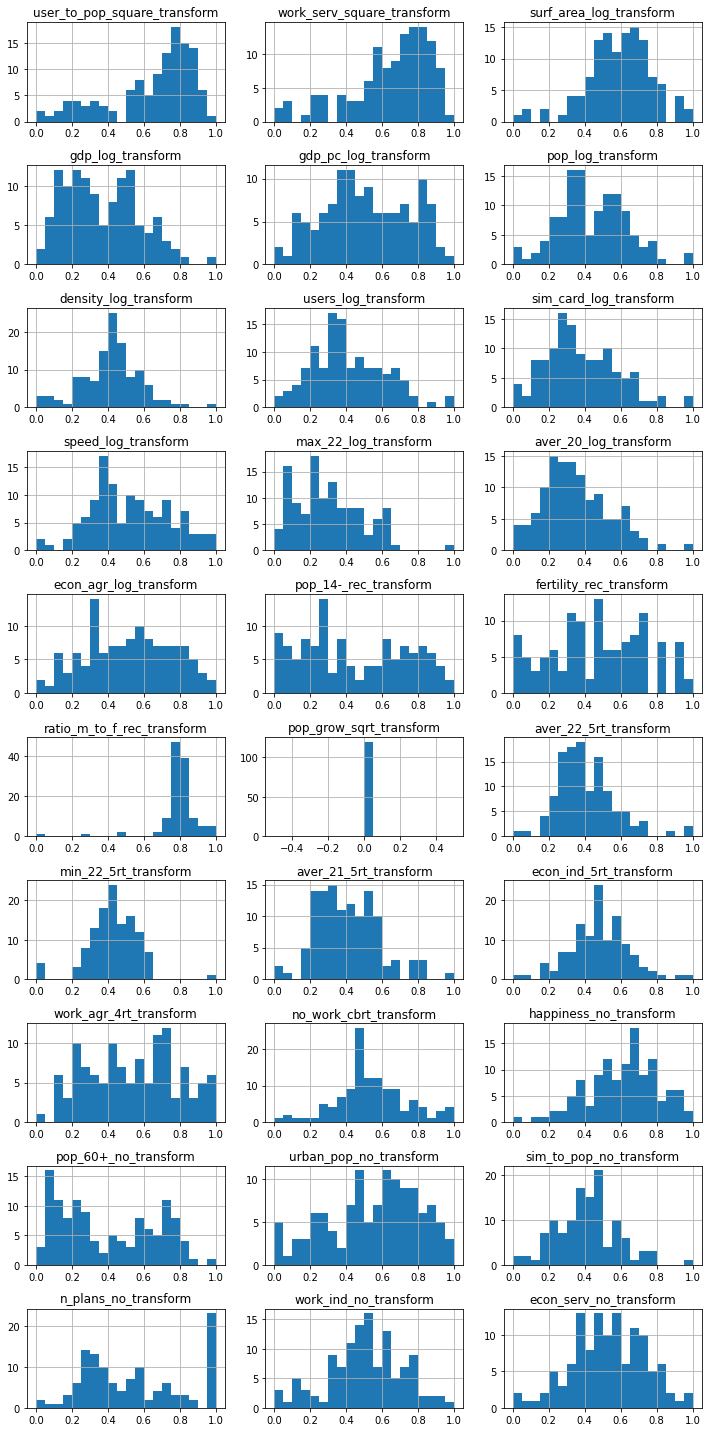

In [16]:
# Build histograms for all numerical variables after all preprocessing procedures (normalizing and scaling)
fig, ax = plt.subplots(10, 3, sharex=False, sharey=False, figsize=(10, 20))

col=2 # two first columns are 'object'
for i in range(10):
    for j in range(3):
        df_norm_full.hist(column = df_norm_full.columns[col], bins = 20, ax=ax[i,j])
        col += 1
            
fig.tight_layout()
fig.show()

In [17]:
# drop column based on histograms
df_norm_full = df_norm_full.drop(columns=['pop_grow_sqrt_transform'])

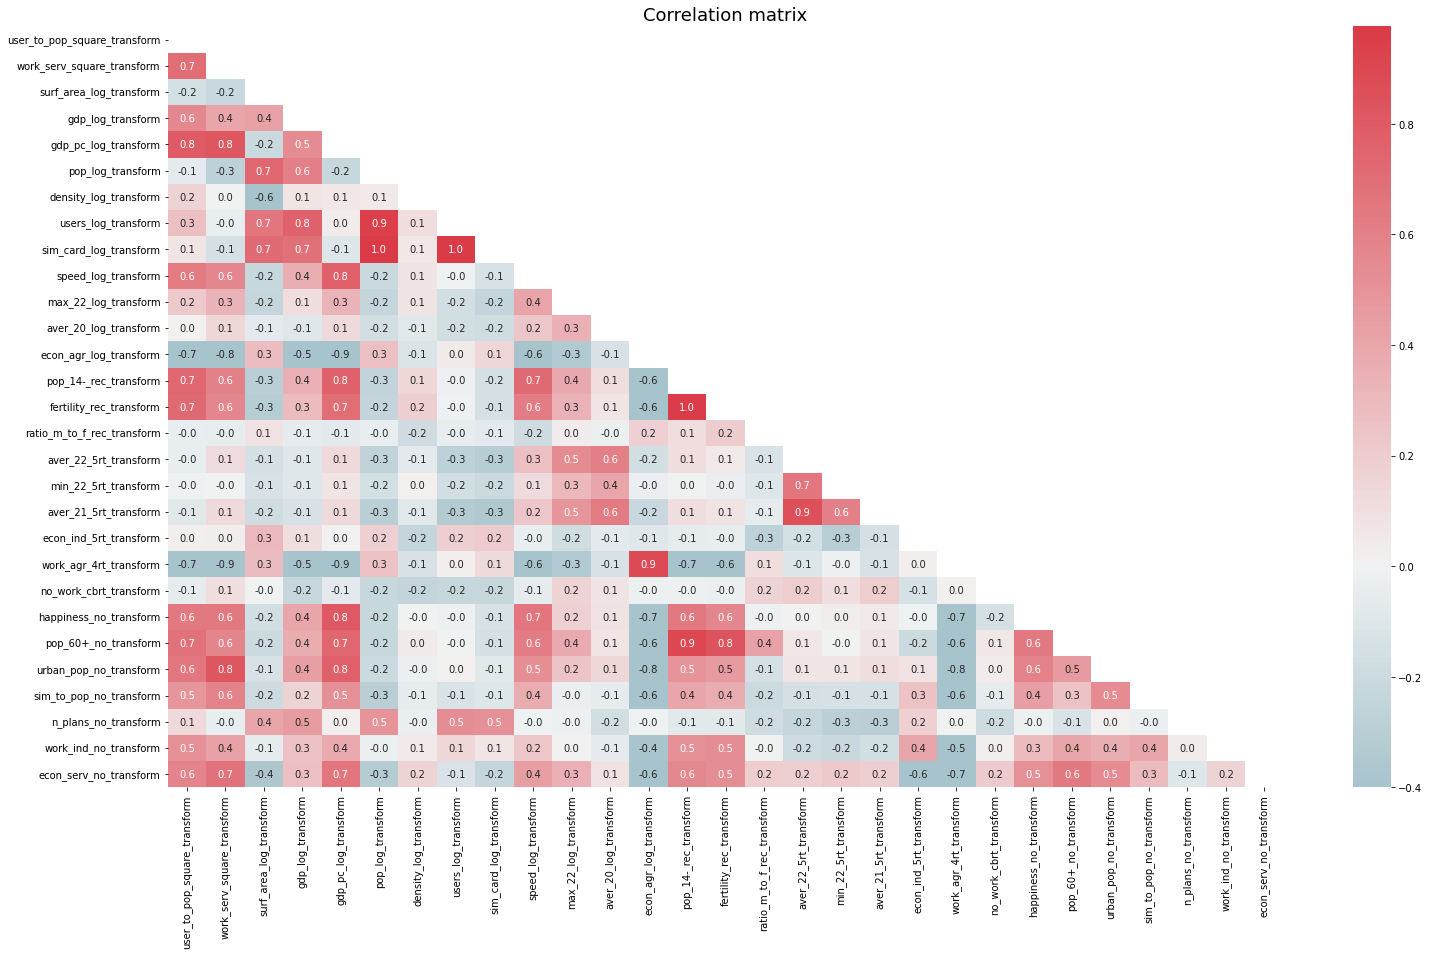

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(df_norm_full.corr())
plt.figure(figsize=(25, 14))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(df_norm_full.corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

## Multicollinearity analysis

It will be done for main variables (inetenet properties)
* speed_log_transform
* user_to_pop_square_transform
* aver_22_5rt_transform
* n_plans_no_transform
* max_22_log_transform


In [19]:
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'speed_log_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
5,pop_log_transform,10898.417427
7,users_log_transform,4891.386507
2,surf_area_log_transform,2976.398680
8,sim_card_log_transform,877.344084
0,user_to_pop_square_transform,873.546374
6,density_log_transform,822.105925
14,ratio_m_to_f_rec_transform,293.873430
12,pop_14-_rec_transform,196.551740
27,econ_serv_no_transform,128.964061
1,work_serv_square_transform,112.489469


In [20]:
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'user_to_pop_square_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
4,pop_log_transform,2751.526194
1,surf_area_log_transform,1418.244147
7,sim_card_log_transform,864.502091
5,density_log_transform,360.472206
14,ratio_m_to_f_rec_transform,298.703296
6,users_log_transform,265.218920
12,pop_14-_rec_transform,199.833599
27,econ_serv_no_transform,123.219218
3,gdp_pc_log_transform,118.361266
0,work_serv_square_transform,112.244956


In [21]:
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'aver_22_5rt_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
5,pop_log_transform,10865.298738
7,users_log_transform,4881.558690
2,surf_area_log_transform,2958.884382
8,sim_card_log_transform,876.577733
0,user_to_pop_square_transform,875.025448
6,density_log_transform,815.615284
15,ratio_m_to_f_rec_transform,297.476067
13,pop_14-_rec_transform,200.455971
27,econ_serv_no_transform,125.529093
4,gdp_pc_log_transform,117.843552


In [22]:
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'n_plans_no_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
5,pop_log_transform,10954.396705
7,users_log_transform,4897.366401
2,surf_area_log_transform,2955.084207
0,user_to_pop_square_transform,876.198226
8,sim_card_log_transform,859.778007
6,density_log_transform,818.937040
15,ratio_m_to_f_rec_transform,295.610341
13,pop_14-_rec_transform,200.926855
27,econ_serv_no_transform,121.522772
4,gdp_pc_log_transform,119.053644


In [23]:
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'max_22_log_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
5,pop_log_transform,10760.327592
7,users_log_transform,4771.060803
2,surf_area_log_transform,2926.087890
8,sim_card_log_transform,875.759282
0,user_to_pop_square_transform,852.411620
6,density_log_transform,803.145046
14,ratio_m_to_f_rec_transform,298.556550
12,pop_14-_rec_transform,200.354992
27,econ_serv_no_transform,126.502618
4,gdp_pc_log_transform,117.053361


Clearly see Variance Inflation Factor is dramatically high (more than 10000). There are different suggestions for the threshold, but all [1](https://medium.com/analytics-vidhya/variance-inflation-factor-vif-c0a39522114e#:~:text=VIF%20is%20used%20to%20detect,and%20selection%20of%20independent%20variables.), [2](https://statisticsbyjim.com/regression/variance-inflation-factors/), [3](https://medium.com/@analyttica/what-is-the-variance-inflation-factor-vif-d1dc12bb9cf5) of them agree that 10 is the maximum. Based on this I drop several columns.

In [24]:
# drop columns based by my opinion and analys
df_norm_full= df_norm_full.drop(columns=['surf_area_log_transform', 'gdp_log_transform', 'sim_card_log_transform', 'pop_60+_no_transform',
                                        'pop_14-_rec_transform', 'ratio_m_to_f_rec_transform', 'users_log_transform', 'fertility_rec_transform',
                                        'econ_serv_no_transform', 'econ_ind_5rt_transform', 'econ_agr_log_transform'])

In [25]:
# Check multicolenearity again for new data set
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'speed_log_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
1,work_serv_square_transform,54.894517
2,gdp_pc_log_transform,49.040832
7,aver_22_5rt_transform,37.678057
0,user_to_pop_square_transform,33.466788
12,happiness_no_transform,33.154135
9,aver_21_5rt_transform,30.290638
13,urban_pop_no_transform,23.043248
8,min_22_5rt_transform,22.095310
10,work_agr_4rt_transform,15.461805
14,sim_to_pop_no_transform,13.953479


In [26]:
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'user_to_pop_square_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
0,work_serv_square_transform,57.105424
1,gdp_pc_log_transform,51.912658
7,aver_22_5rt_transform,38.148020
12,happiness_no_transform,33.911396
9,aver_21_5rt_transform,28.786299
13,urban_pop_no_transform,23.133460
8,min_22_5rt_transform,21.956340
4,speed_log_transform,21.640778
10,work_agr_4rt_transform,15.458024
14,sim_to_pop_no_transform,14.379272


In [27]:
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'aver_22_5rt_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
2,gdp_pc_log_transform,58.813199
1,work_serv_square_transform,57.263888
0,user_to_pop_square_transform,34.065999
12,happiness_no_transform,32.565786
13,urban_pop_no_transform,22.572844
5,speed_log_transform,21.756873
8,min_22_5rt_transform,19.235939
9,aver_21_5rt_transform,19.152828
10,work_agr_4rt_transform,15.381955
14,sim_to_pop_no_transform,14.382750


In [28]:
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'n_plans_no_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
2,gdp_pc_log_transform,59.139796
1,work_serv_square_transform,57.875426
8,aver_22_5rt_transform,38.020902
13,happiness_no_transform,33.941357
0,user_to_pop_square_transform,33.503637
10,aver_21_5rt_transform,30.155174
14,urban_pop_no_transform,22.976543
5,speed_log_transform,22.018403
9,min_22_5rt_transform,21.566206
11,work_agr_4rt_transform,15.031797


In [29]:
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'max_22_log_transform'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
2,gdp_pc_log_transform,59.114916
1,work_serv_square_transform,56.806108
7,aver_22_5rt_transform,36.746003
0,user_to_pop_square_transform,34.074388
12,happiness_no_transform,33.815606
9,aver_21_5rt_transform,30.195904
13,urban_pop_no_transform,23.123710
8,min_22_5rt_transform,22.495307
5,speed_log_transform,21.102589
10,work_agr_4rt_transform,15.354727


Now VIF is no more than 60. It is still not good, but better than it was.

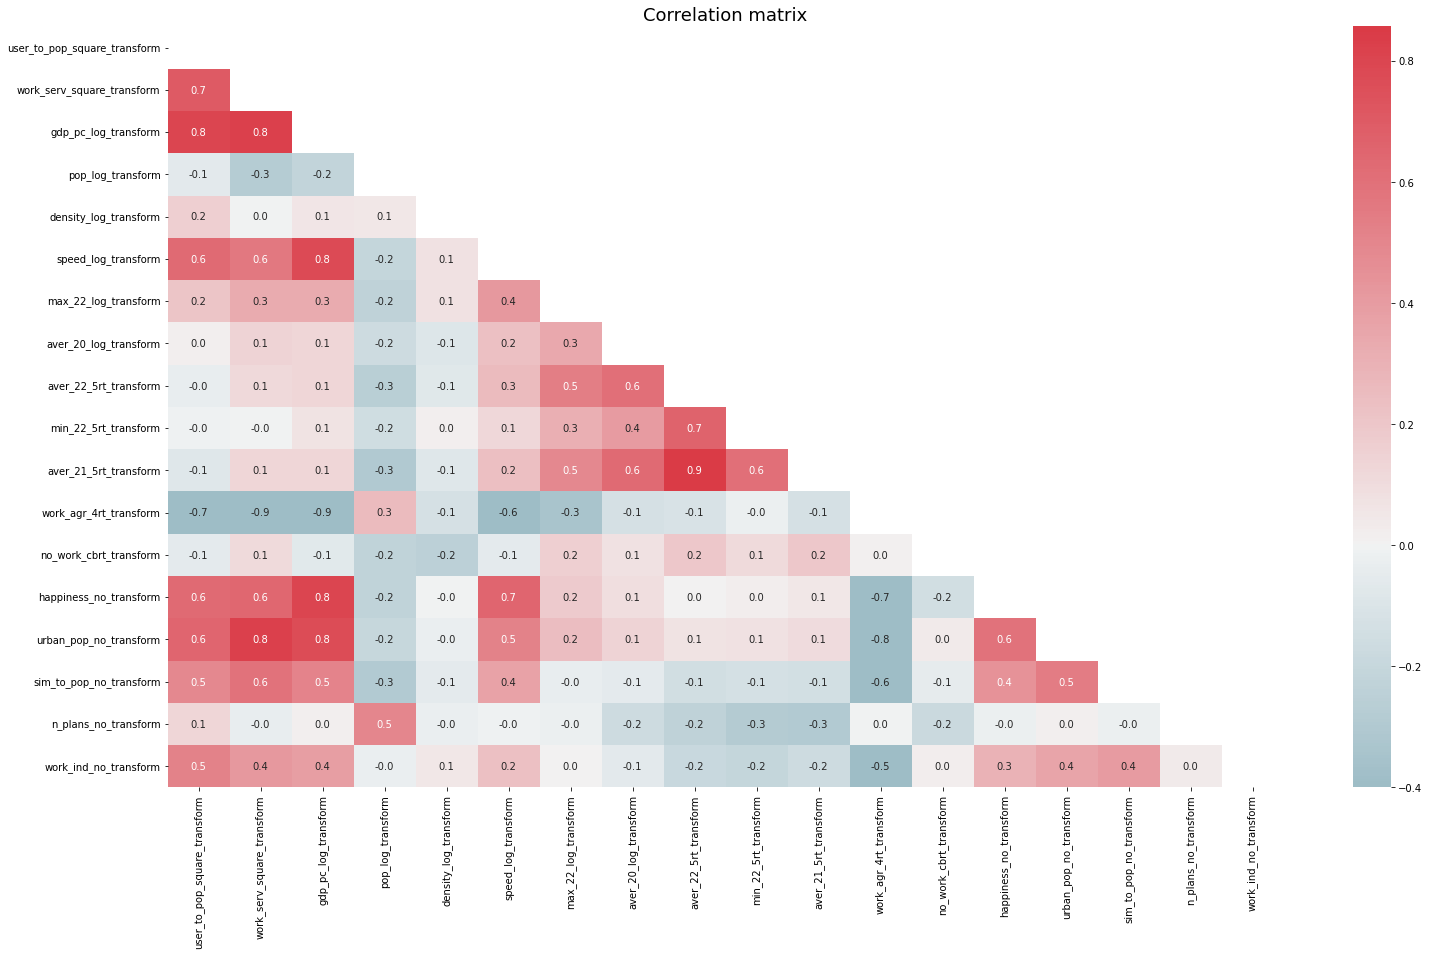

In [30]:
# heatmap for new df
cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(df_norm_full.corr())
plt.figure(figsize=(25, 14))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(df_norm_full.corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

## Correlation 

Here I create a list of all correlations of the main internet properties with variables. 
There are three regions: 
* strong correlation. abs(threshold) >=0.5
* weak correlation. abs(threshold) from 0.0 up to 0.2
* strong and medium correlation. abs(threshold) from 0.2 

I do it to use in theHypothesis testing section.

Also I found severa insights based on ths data:
* Three of the four variables with the strongest correlations for maximum internet price in 2022 are average prices in 2020-2022. This is also correct for the Average internet price in the current year.
* Number of internet Plans correlated with population and Internet prices. I expected that the price would be correlated with the Number of Plans. 


In [31]:
# selecting targets for analysis
cols=['speed_log_transform', 'user_to_pop_square_transform', 'max_22_log_transform', 'n_plans_no_transform', 'aver_22_5rt_transform' ]

df_norm_full_numerick= df_norm_full.select_dtypes(include = ['float64', 'int64'])
# strong correlation. abs(threshold) >=0.5
for col in cols:
    df_norm_full_numerick_corr = df_norm_full_numerick.corr()[col]
    top_features_strong = df_norm_full_numerick_corr[(abs(df_norm_full_numerick_corr)>=0.5) & (df_norm_full_numerick_corr.index != col)].round(2).sort_values(ascending=False)   #displays pearsons correlation coefficient greater than x
    print('{} Strong correlated features for {}:\n{}'.format(len(top_features_strong), col, top_features_strong))

6 Strong correlated features for speed_log_transform:
gdp_pc_log_transform            0.78
happiness_no_transform          0.65
user_to_pop_square_transform    0.63
work_serv_square_transform      0.57
urban_pop_no_transform          0.52
work_agr_4rt_transform         -0.65
Name: speed_log_transform, dtype: float64
7 Strong correlated features for user_to_pop_square_transform:
gdp_pc_log_transform          0.80
work_serv_square_transform    0.70
urban_pop_no_transform        0.65
happiness_no_transform        0.64
speed_log_transform           0.63
work_ind_no_transform         0.51
work_agr_4rt_transform       -0.73
Name: user_to_pop_square_transform, dtype: float64
1 Strong correlated features for max_22_log_transform:
aver_22_5rt_transform    0.54
Name: max_22_log_transform, dtype: float64
0 Strong correlated features for n_plans_no_transform:
Series([], Name: n_plans_no_transform, dtype: float64)
4 Strong correlated features for aver_22_5rt_transform:
aver_21_5rt_transform    0.86

In [32]:
# weak correlation. from 0.0 up to 0.2
for col in cols:
    df_norm_full_numerick_corr = df_norm_full_numerick.corr()[col]
    top_features_weak = df_norm_full_numerick_corr[(abs(df_norm_full_numerick_corr)<0.2) & (abs(df_norm_full_numerick_corr)>=0.0) & (df_norm_full_numerick_corr.index != col)].round(2).sort_values(ascending=False)   #displays pearsons correlation coefficient greater than x
    print('{} Weak correlated features for {}:\n{}'.format(len(top_features_weak), col, top_features_weak))

4 Weak correlated features for speed_log_transform:
min_22_5rt_transform      0.12
density_log_transform     0.08
n_plans_no_transform     -0.01
no_work_cbrt_transform   -0.06
Name: speed_log_transform, dtype: float64
8 Weak correlated features for user_to_pop_square_transform:
density_log_transform     0.17
n_plans_no_transform      0.13
aver_20_log_transform     0.01
min_22_5rt_transform     -0.01
aver_22_5rt_transform    -0.03
pop_log_transform        -0.06
no_work_cbrt_transform   -0.06
aver_21_5rt_transform    -0.08
Name: user_to_pop_square_transform, dtype: float64
6 Weak correlated features for max_22_log_transform:
happiness_no_transform     0.18
no_work_cbrt_transform     0.16
density_log_transform      0.08
work_ind_no_transform      0.01
n_plans_no_transform      -0.02
sim_to_pop_no_transform   -0.03
Name: max_22_log_transform, dtype: float64
13 Weak correlated features for n_plans_no_transform:
user_to_pop_square_transform    0.13
work_ind_no_transform           0.04
gdp_pc

In [33]:
# strong and medium  correlation. from 0.2 
for col in cols:
    df_norm_full_numerick_corr = df_norm_full_numerick.corr()[col]
    top_features = df_norm_full_numerick_corr[(abs(df_norm_full_numerick_corr)>=0.2) & (df_norm_full_numerick_corr.index != col)].round(2).sort_values(ascending=False)   #displays pearsons correlation coefficient greater than x
    print('{} correlated features for {}:\n{}'.format(len(top_features), col, top_features))

13 correlated features for speed_log_transform:
gdp_pc_log_transform            0.78
happiness_no_transform          0.65
user_to_pop_square_transform    0.63
work_serv_square_transform      0.57
urban_pop_no_transform          0.52
max_22_log_transform            0.42
sim_to_pop_no_transform         0.37
aver_22_5rt_transform           0.26
aver_20_log_transform           0.23
aver_21_5rt_transform           0.23
work_ind_no_transform           0.23
pop_log_transform              -0.21
work_agr_4rt_transform         -0.65
Name: speed_log_transform, dtype: float64
9 correlated features for user_to_pop_square_transform:
gdp_pc_log_transform          0.80
work_serv_square_transform    0.70
urban_pop_no_transform        0.65
happiness_no_transform        0.64
speed_log_transform           0.63
work_ind_no_transform         0.51
sim_to_pop_no_transform       0.49
max_22_log_transform          0.21
work_agr_4rt_transform       -0.73
Name: user_to_pop_square_transform, dtype: float64
11 corr

In [34]:
# add new column 'continent'
df_norm_full['region'] = df_norm_full['region'].str.lstrip() # Delet first Withspace in 'region'
df_norm_full['continent'] = df_norm_full['region']
df_norm_full['continent'] = df_norm_full['continent'].map({'Eastern Asia': 'Asia', 'Southern Asia': 'Asia', 'South-eastern Asia': 'Asia', 'Western Asia': 'Asia', 'Central Asia': 'Asia',
                                                          'Northern America': 'Northern America', 'South America': 'South America', 'Central America': 'South America', 'Caribbean': 'South America', 
                                                          'Western Africa': 'Africa', 'Northern Africa': 'Africa', 'Southern Africa': 'Africa', 'Eastern Africa': 'Africa', 'Middle Africa': 'Africa',
                                                          'Oceania': 'Oceania', 'Eastern Europe': 'Europe', 'Western Europe': 'Europe', 'Northern Europe': 'Europe', 'Southern Europe': 'Europe'})

# fix value in continent for Mexico. 1) find index
df_norm_full.loc[df_norm_full['country'] == 'Mexico']
# fix value in continent for Mexico. 2) fix
df_norm_full.at[10, 'continent'] = 'Northern America'


## EDA

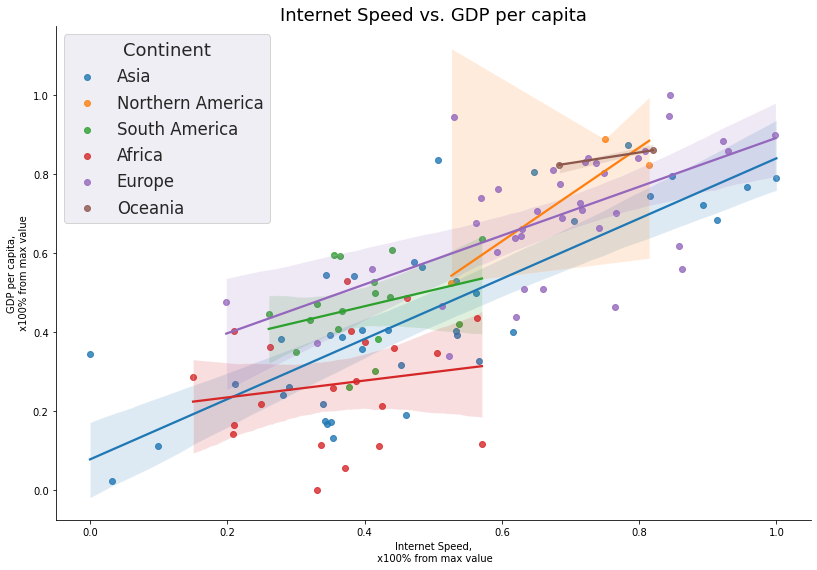

In [35]:
# Plot Internet Speed vs. GDP per capita
speed_gdp_plot=sns.lmplot(x='speed_log_transform', 
                          y='gdp_pc_log_transform', 
                          data=df_norm_full, hue='continent', 
                          fit_reg=True, height=8.27, aspect=11.7/8.27,
                          legend = False)
speed_gdp_plot=speed_gdp_plot.set_axis_labels("Internet Speed,\n x100% from max value", 
                                              "GDP per capita,\n x100% from max value")
sns.set(font_scale=1.5)
plt.title("Internet Speed vs. GDP per capita")
plt.tight_layout()
plt.legend(loc='upper left', title = 'Continent')

In this plot, one clearly sees that Internet speed is highly dependent on GDP. The level of dependency is different on different continents, but in all cases the dependency is positive.

Below there are five violin plots. Four present the distributions of different internet properties by continent, and one is GDP distributions by continent.
Based on those five plots, we can say there are bimodal distributions for all continents except Oceania. For some plots, it is very clear (for example Number of Internet plans); for some, it is not so (for example, Average Internet price).
As a first assumption, we can use the idea that GDP is one of the strongest factors influencing Internet Properties.

Text(0.5, 1.0, 'Number of Internet Plans on different Continents')

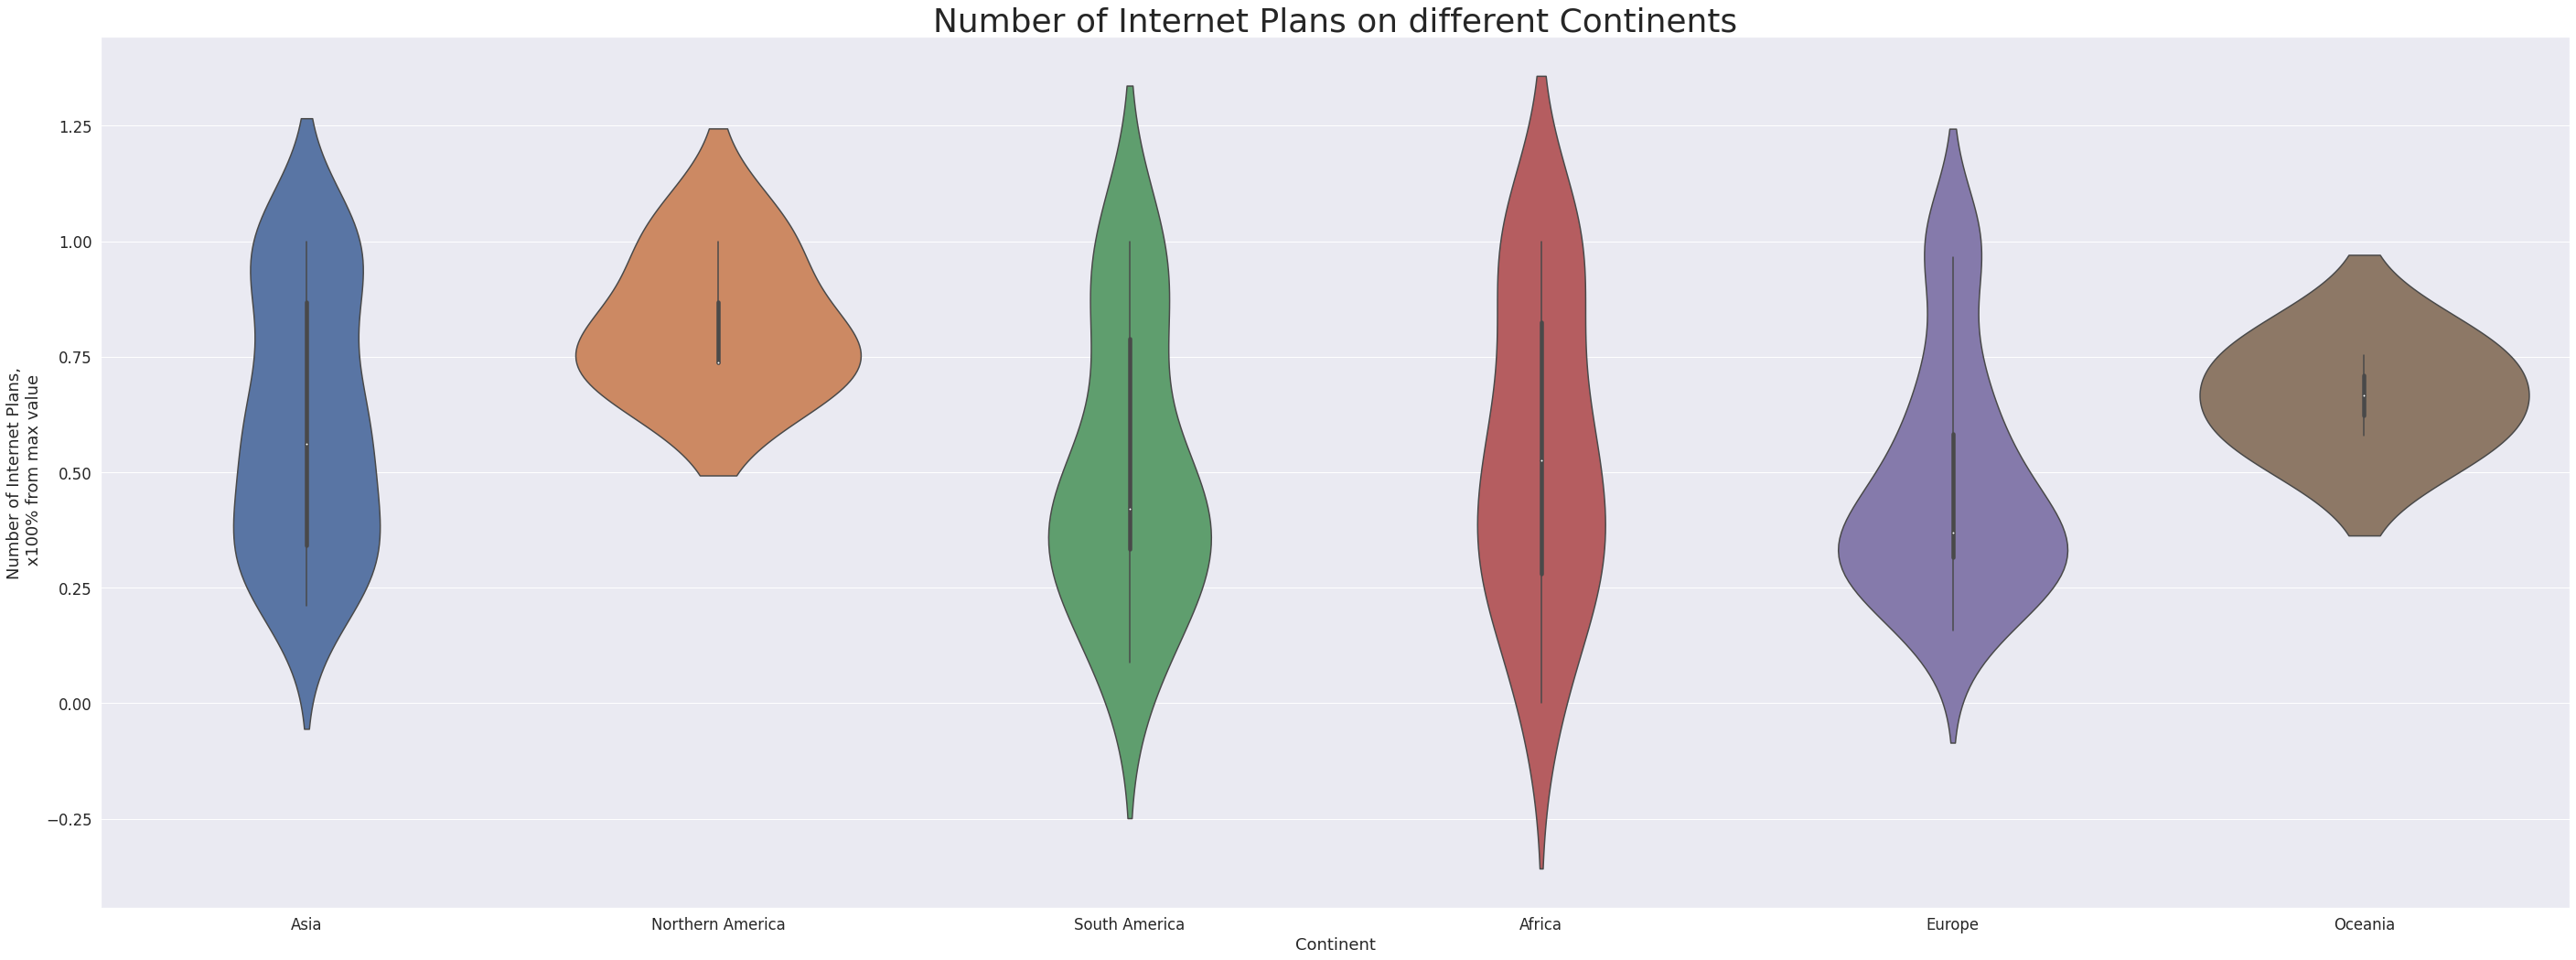

In [36]:
plt.figure(figsize = (40,15))
g = sns.violinplot(x="continent", y="n_plans_no_transform", data=df_norm_full)
sns.set(font_scale=3)
plt.xlabel("Continent")
plt.ylabel("Number of Internet Plans,\n x100% from max value")
plt.tight_layout()
plt.title("Number of Internet Plans on different Continents")

Text(0.5, 1.0, 'Number of Internet users to Population on different Continents')

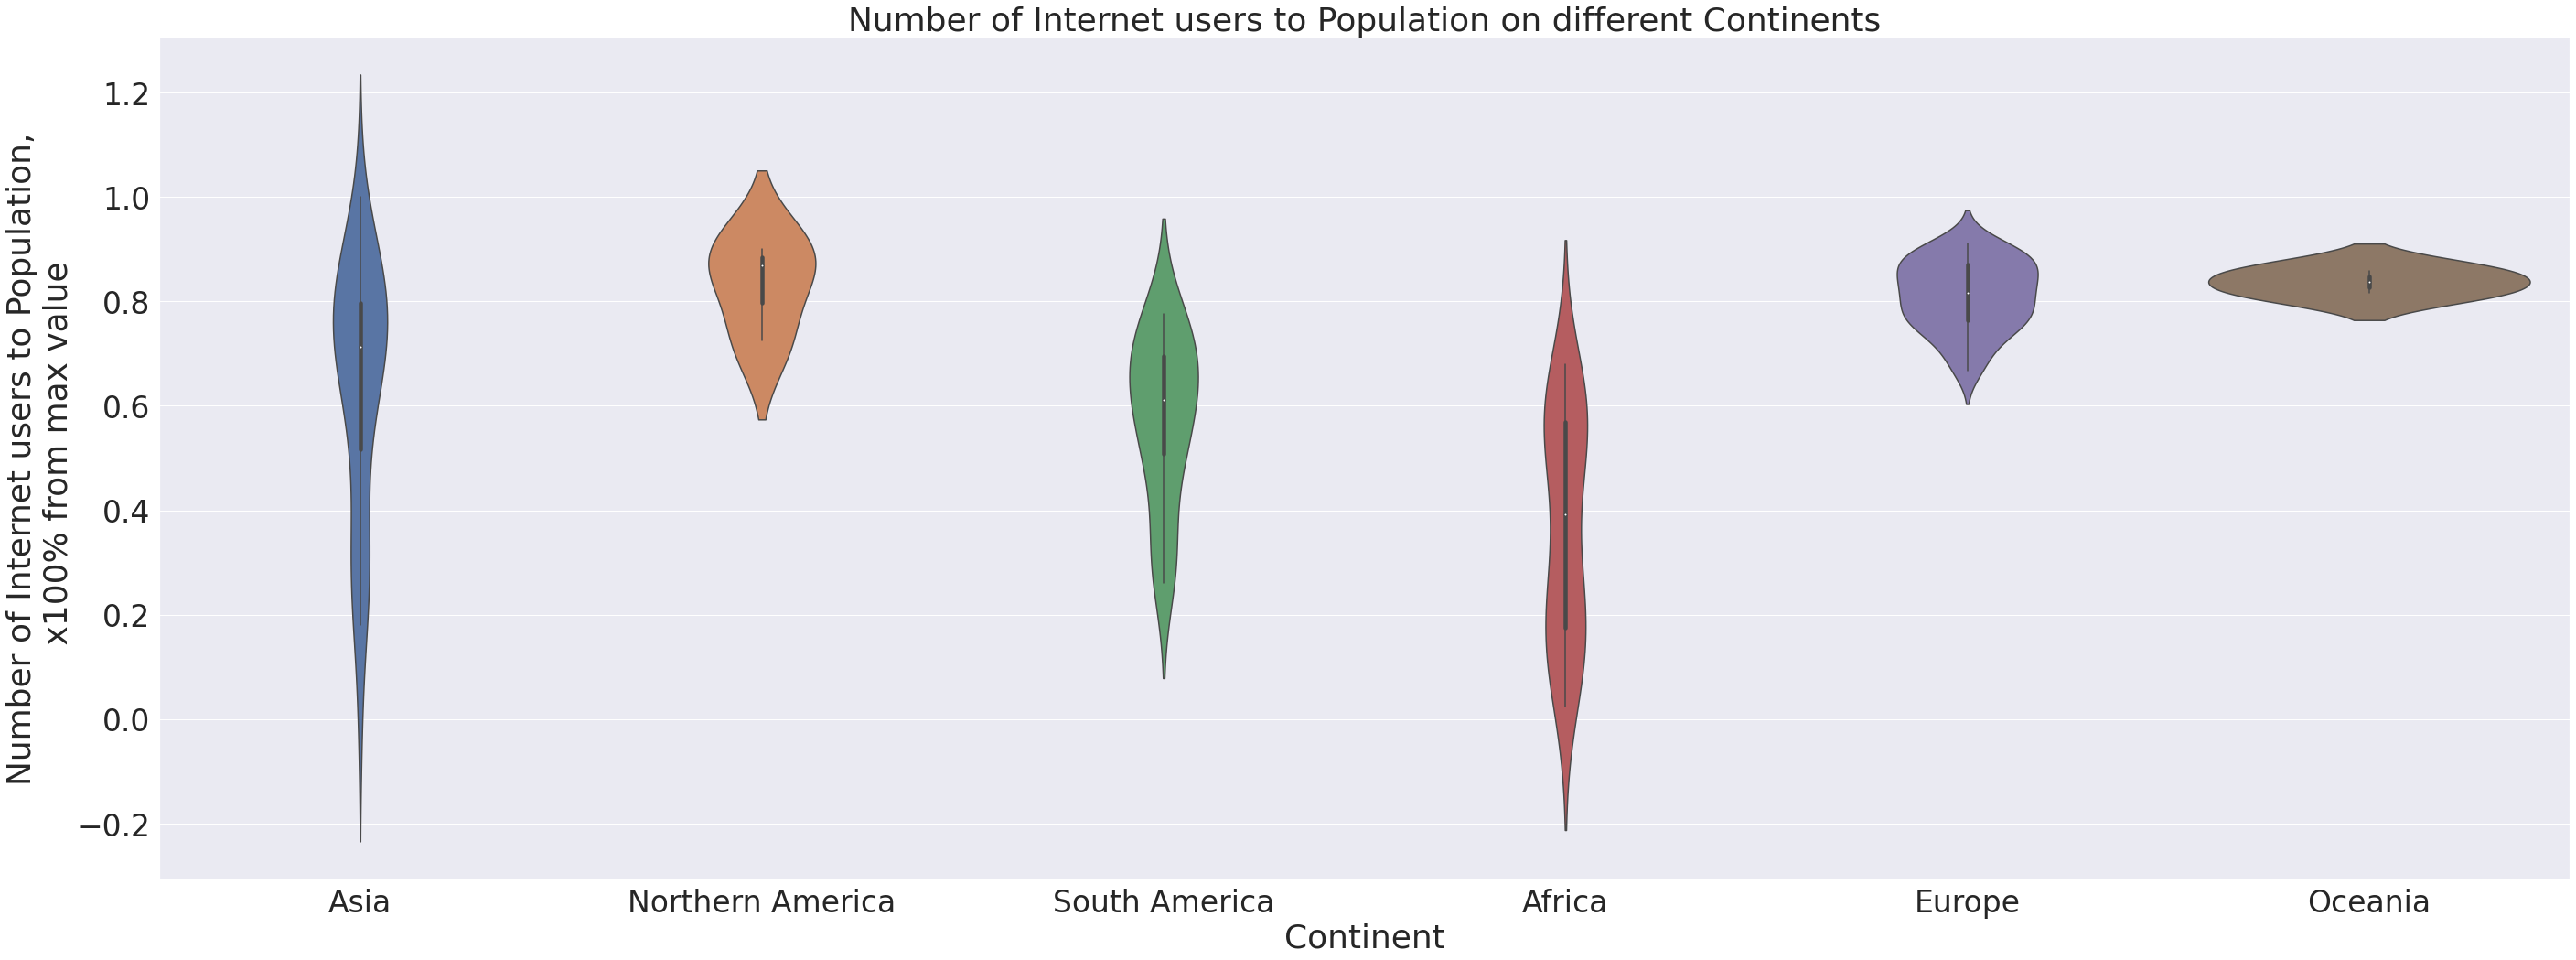

In [37]:
plt.figure(figsize = (40,15))
ax = sns.violinplot(x="continent", y="user_to_pop_square_transform", data=df_norm_full)
sns.set(font_scale=3)
plt.xlabel("Continent")
plt.ylabel("Number of Internet users to Population,\n x100% from max value")
plt.tight_layout()
plt.title("Number of Internet users to Population on different Continents")

Text(0.5, 1.0, 'Avarage Internet Price on different Continents')

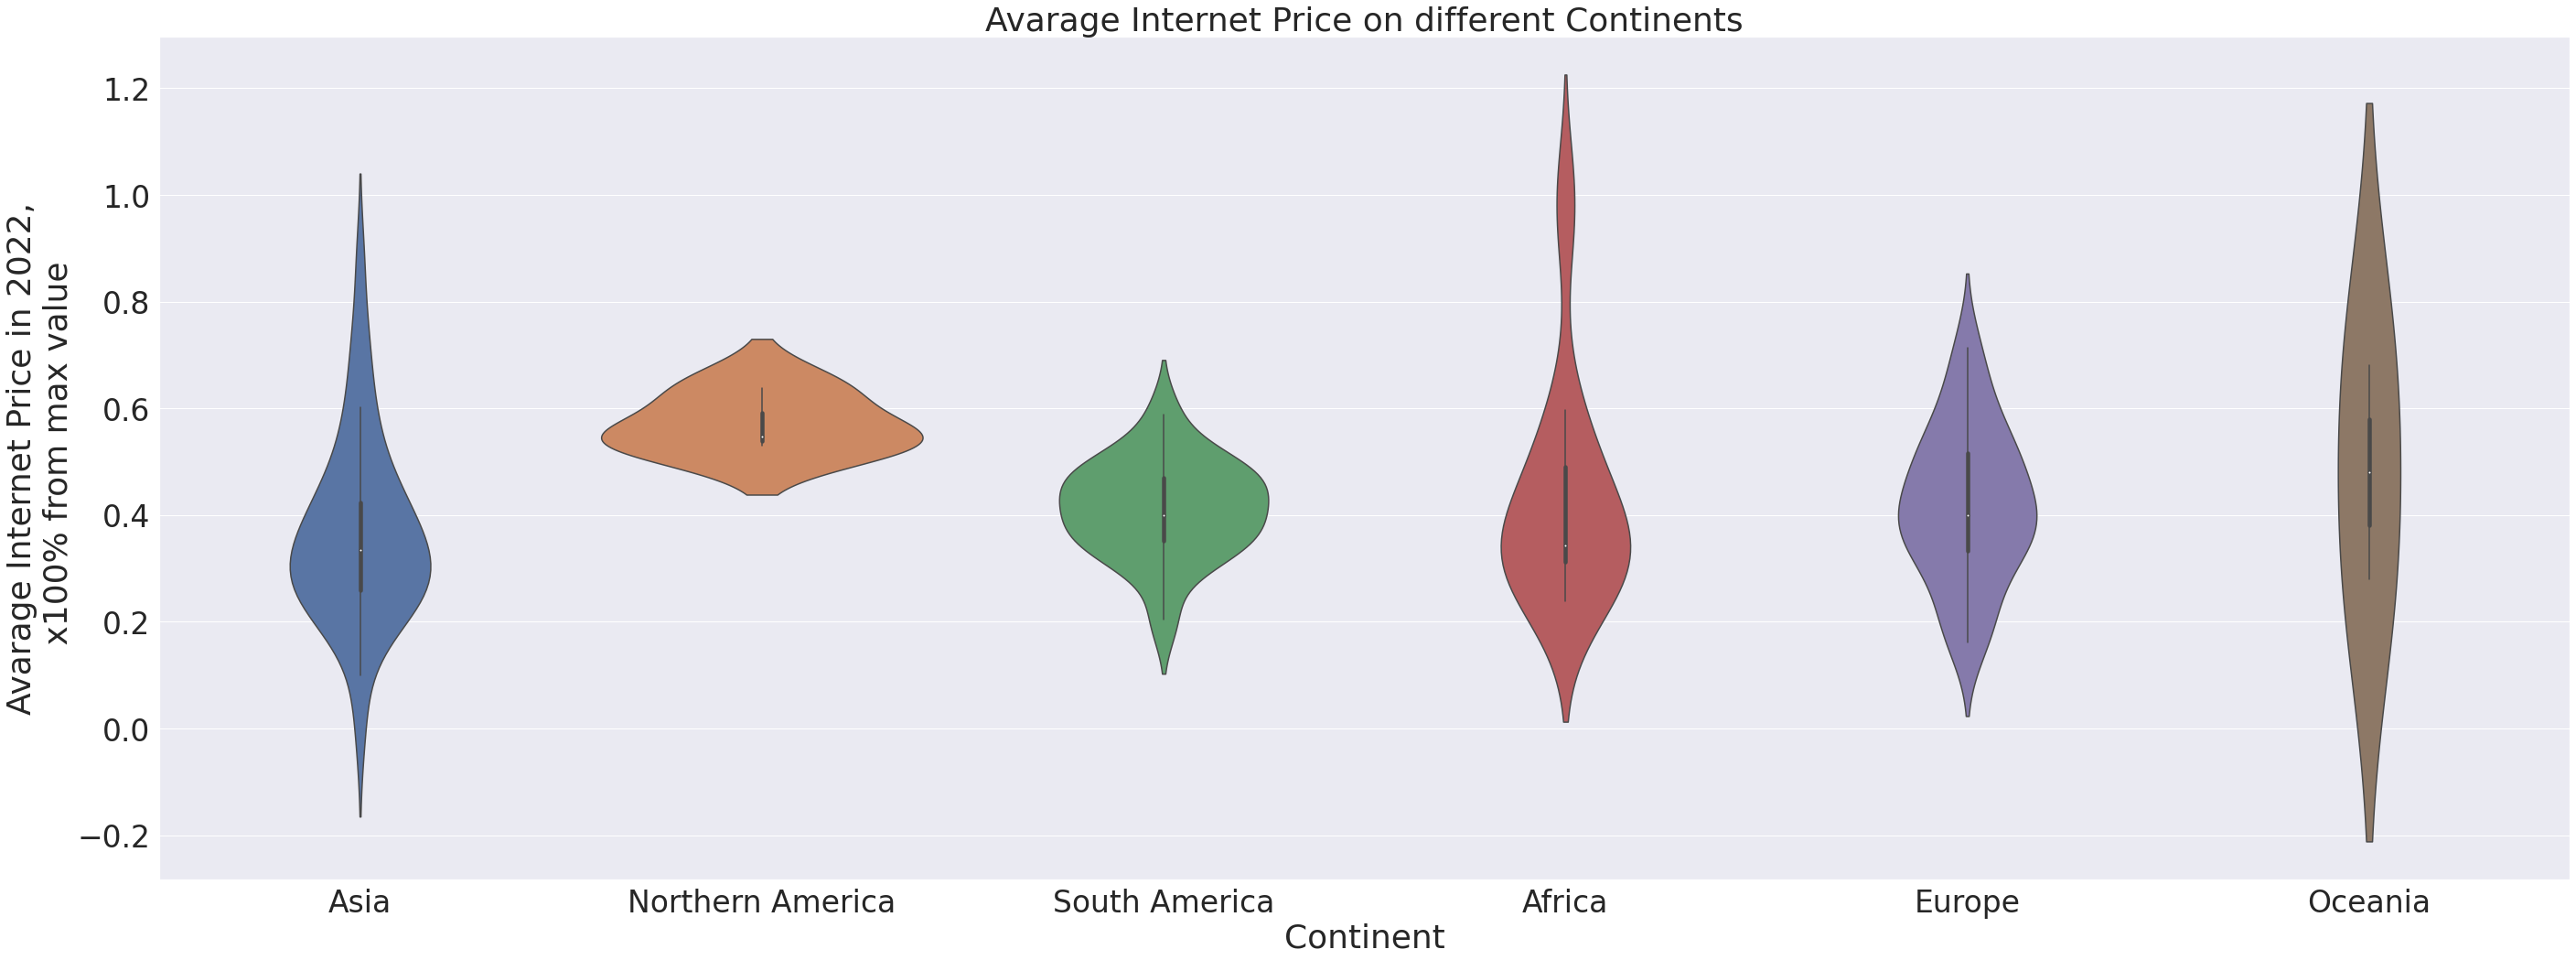

In [38]:
plt.figure(figsize = (40,15))
ax = sns.violinplot(x="continent", y="aver_22_5rt_transform", data=df_norm_full)
sns.set(font_scale=3)
plt.xlabel("Continent")
plt.ylabel("Avarage Internet Price in 2022,\n x100% from max value")
plt.tight_layout()
plt.title("Avarage Internet Price on different Continents")

Text(0.5, 1.0, 'Avarage Internet Speed on different Continents')

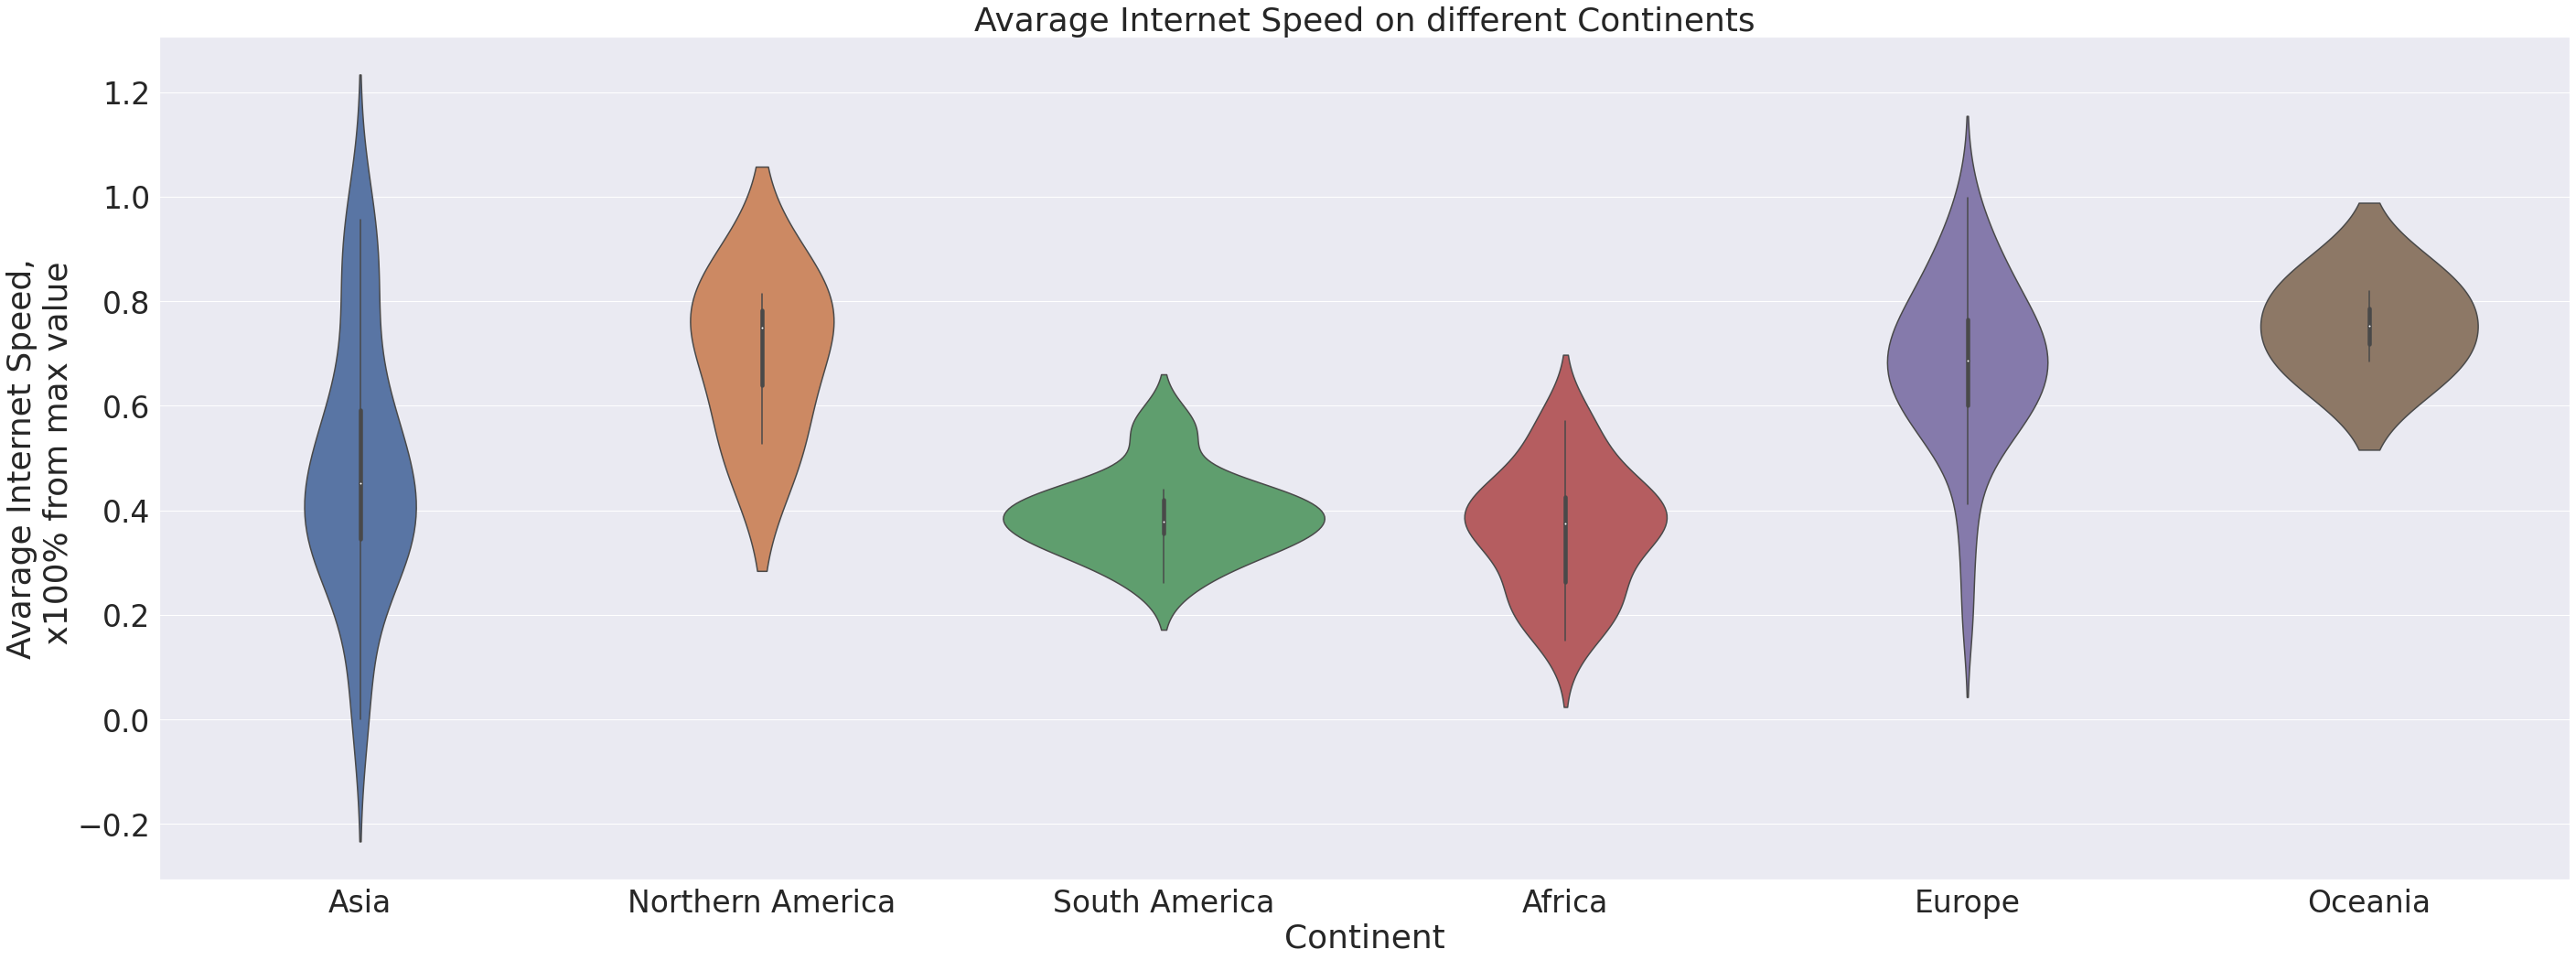

In [39]:
plt.figure(figsize = (40,15))
ax = sns.violinplot(x="continent", y="speed_log_transform", data=df_norm_full)
sns.set(font_scale=3)
plt.xlabel("Continent")
plt.ylabel("Avarage Internet Speed,\n x100% from max value")
plt.tight_layout()
plt.title("Avarage Internet Speed on different Continents")

Text(0.5, 1.0, 'GDP per Capita on different Continents')

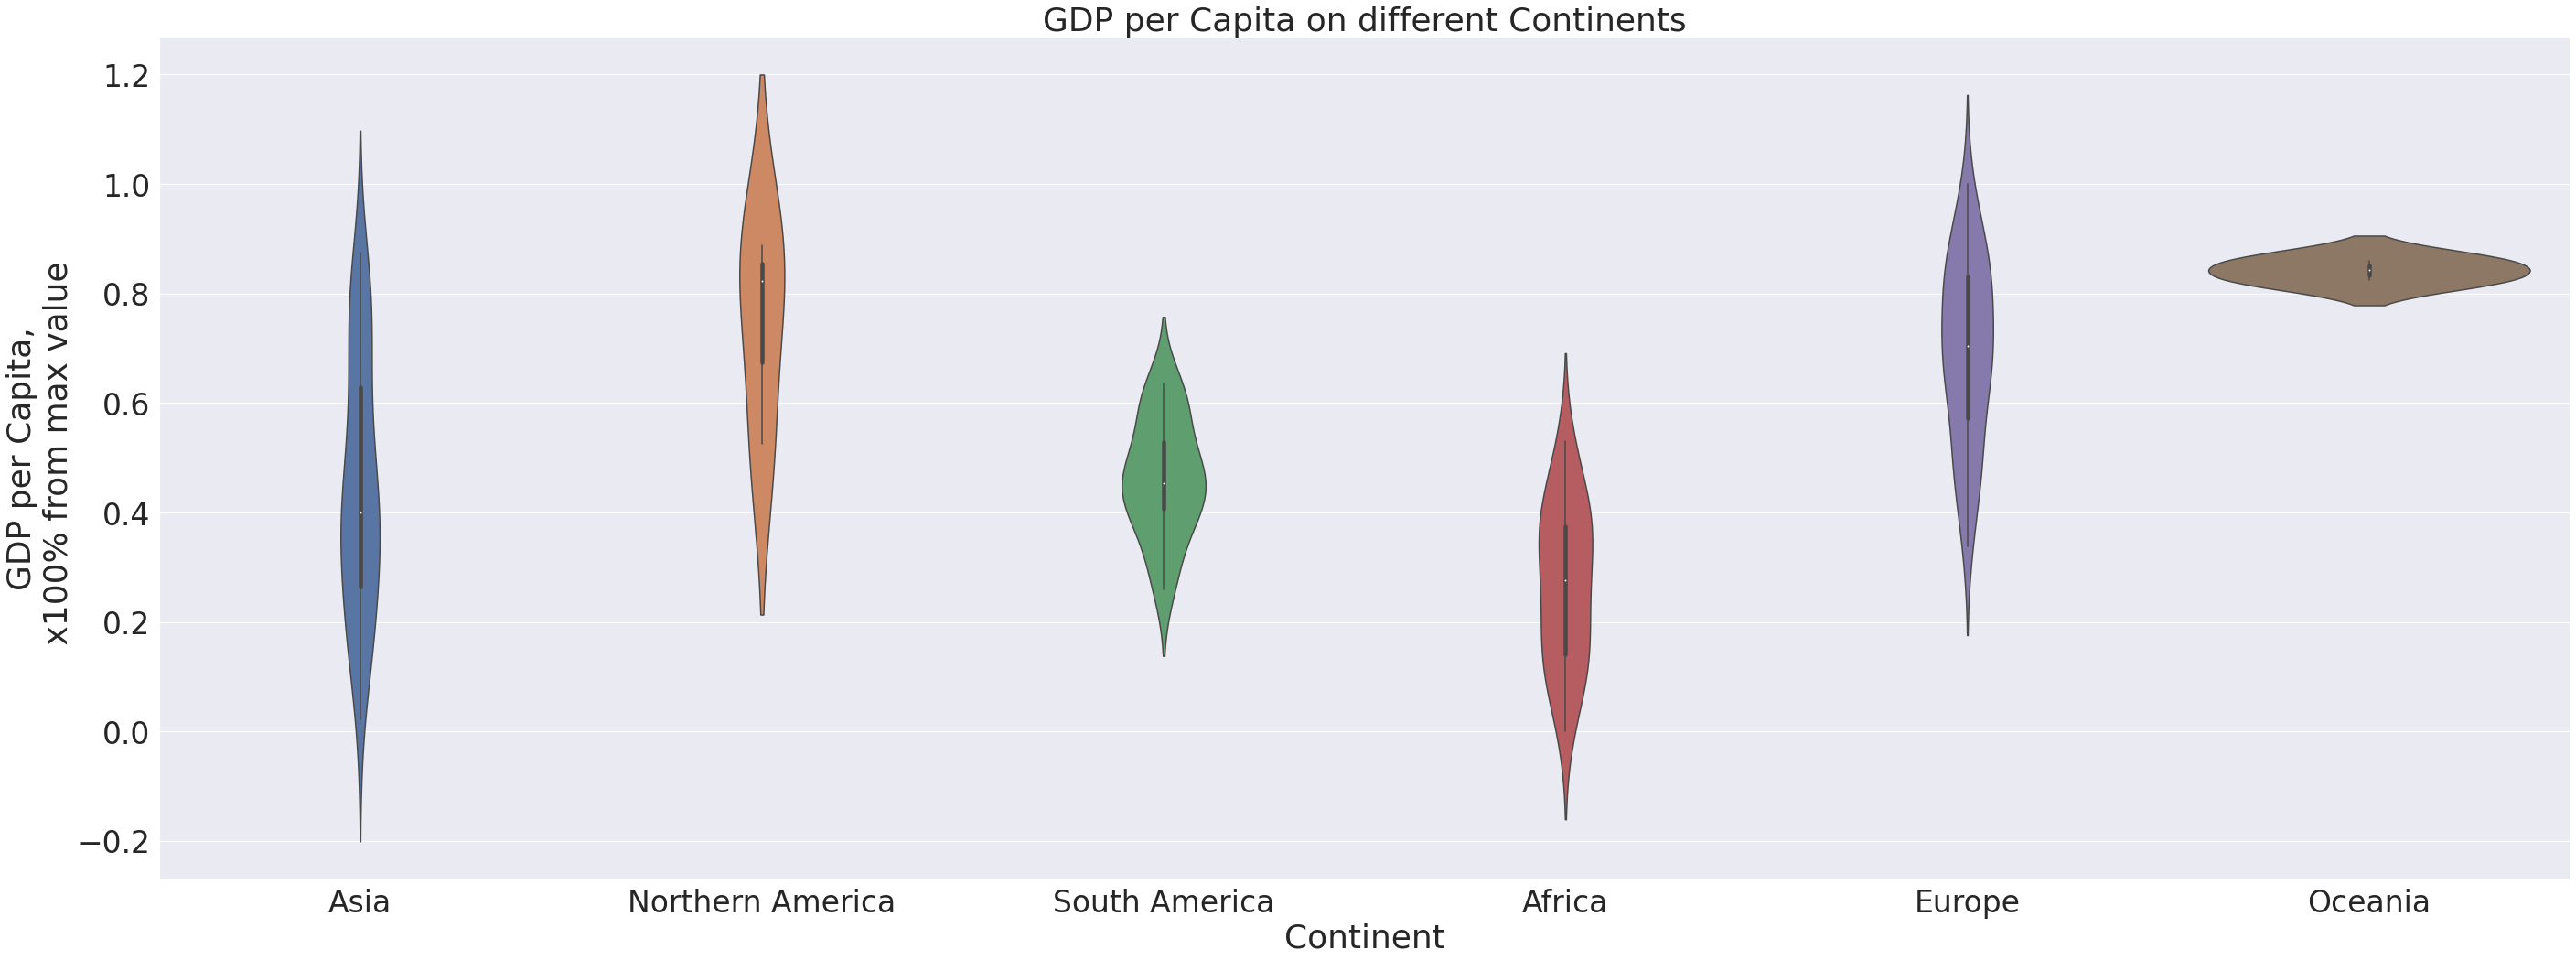

In [40]:
plt.figure(figsize = (40,15))
ax = sns.violinplot(x="continent", y="gdp_pc_log_transform", data=df_norm_full)
sns.set(font_scale=3)
plt.xlabel("Continent")
plt.ylabel("GDP per Capita,\n x100% from max value")
plt.tight_layout()
plt.title("GDP per Capita on different Continents")

## Hypothesis testing

Below there are three different hypotheses checking. I want to check from which level of correlation from the heat map we can say there is a correlation from a statistical point of view.
I use one parameter - **The Maximum Internet Price in 2022**  and three variables - *Average Price in 2021*, *Urban Population* and *Workers in the Industrial Sector*. <br> 
The correlation for these variables is 
* The average price in 2021 - 0.49, 
* Urban population - 0.25, 
* per cent workers in the industrial sector -  0.01.

As I expected, the first variable (Average price in 2021 ) has strong statistical proof that they correlate to the The maximum internet price in 2022. The value of Prob (F-statistic) is 1.23e-08. This value means the probability of no correlation is 1.23e-08 %, which is very small. Also, the value of R-squared is 0.241, which means that (Average price in 2021) can explain 24% of the behaviour of The Maximum Internet Price in 2022.

The Urban population variable has statistical proof that they correlate to the The Maximum Internet Price in 2022 because Prob (F-statistic) is 0.7627 bigger than P>|t| = 0.007.

The last (per cent workers in the industrial sector) statistically does not correlate to The Maximum Internet Price in 2022.  Prob (F-statistic) is 0.004797 less than P>|t| = 0.945.

In conclusion, I can suppose that the range value of correlation from heat map 0.2-0.3 can be recognised as a threshold in this case. For other cases, additional experiments should be done.   

More information about this method and [lib](https://www.statsmodels.org/dev/index.html) you can find [here](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a) and [here](https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b).

In [41]:
model1=smf.ols('max_22_log_transform ~ aver_21_5rt_transform',df_norm_full).fit()
print(model1.summary())

                             OLS Regression Results                             
Dep. Variable:     max_22_log_transform   R-squared:                       0.241
Model:                              OLS   Adj. R-squared:                  0.235
Method:                   Least Squares   F-statistic:                     37.51
Date:                  Wed, 09 Nov 2022   Prob (F-statistic):           1.23e-08
Time:                          11:30:38   Log-Likelihood:                 49.113
No. Observations:                   120   AIC:                            -94.23
Df Residuals:                       118   BIC:                            -88.65
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

In [42]:
model2=smf.ols('max_22_log_transform ~ urban_pop_no_transform',df_norm_full).fit()
print(model2.summary())

                             OLS Regression Results                             
Dep. Variable:     max_22_log_transform   R-squared:                       0.061
Model:                              OLS   Adj. R-squared:                  0.053
Method:                   Least Squares   F-statistic:                     7.627
Date:                  Wed, 09 Nov 2022   Prob (F-statistic):            0.00667
Time:                          11:30:38   Log-Likelihood:                 36.308
No. Observations:                   120   AIC:                            -68.62
Df Residuals:                       118   BIC:                            -63.04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

In [43]:
model3=smf.ols('max_22_log_transform ~ work_ind_no_transform',df_norm_full).fit()
print(model3.summary())

                             OLS Regression Results                             
Dep. Variable:     max_22_log_transform   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.008
Method:                   Least Squares   F-statistic:                  0.004797
Date:                  Wed, 09 Nov 2022   Prob (F-statistic):              0.945
Time:                          11:30:38   Log-Likelihood:                 32.552
No. Observations:                   120   AIC:                            -61.10
Df Residuals:                       118   BIC:                            -55.53
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

<p style="text-align: center; font-weight: 700;"> 
Thank you for reading!<br />
Any feedback is greatly appreciated.

</p>